In [3]:
from collections import defaultdict
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import math
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import LeaveOneOut
import joblib
import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

In [4]:
data_df = pd.read_json('json_data/Video_Games_5.json', lines=True)

In [5]:
data_df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1445040000,NaN,NaN,NaN
1,4,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1437955200,NaN,NaN,NaN
2,3,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,1424649600,NaN,NaN,NaN
3,2,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,1424390400,NaN,NaN,NaN
4,5,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,1419465600,NaN,NaN,NaN


In [6]:
data_df.shape

(497577, 12)

In [7]:
data_df.dtypes

overall            int64
verified            bool
reviewTime        object
reviewerID        object
asin              object
reviewerName      object
reviewText        object
summary           object
unixReviewTime     int64
vote              object
style             object
image             object
dtype: object

In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497577 entries, 0 to 497576
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   overall         497577 non-null  int64 
 1   verified        497577 non-null  bool  
 2   reviewTime      497577 non-null  object
 3   reviewerID      497577 non-null  object
 4   asin            497577 non-null  object
 5   reviewerName    497501 non-null  object
 6   reviewText      497419 non-null  object
 7   summary         497468 non-null  object
 8   unixReviewTime  497577 non-null  int64 
 9   vote            107793 non-null  object
 10  style           289237 non-null  object
 11  image           3634 non-null    object
dtypes: bool(1), int64(2), object(9)
memory usage: 42.2+ MB


In [9]:
print('Number of missing values across columns: \n',data_df.isnull().sum())

Number of missing values across columns: 
 overall                0
verified               0
reviewTime             0
reviewerID             0
asin                   0
reviewerName          76
reviewText           158
summary              109
unixReviewTime         0
vote              389784
style             208340
image             493943
dtype: int64


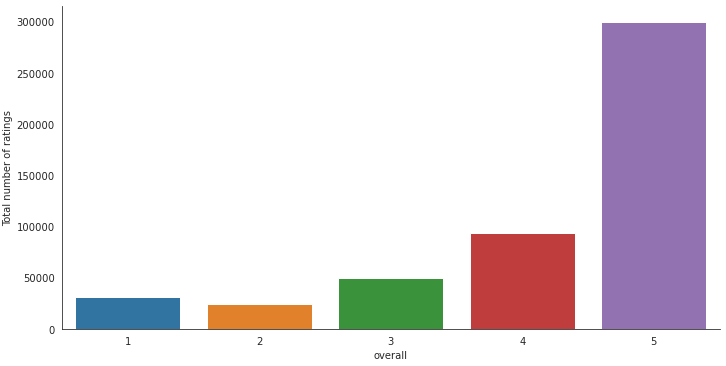

In [10]:
with sns.axes_style('white'):
    g = sns.factorplot("overall", data=data_df, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

In [11]:
no_of_rated_products_per_user = data_df.groupby(by='asin')['overall'].count().sort_values(ascending=False)

no_of_rated_products_per_user.head()

asin
B00178630A    1381
B000ZK9QCS     905
B000XJNTNS     834
B00JK00S0S     783
B000ZKA0J6     774
Name: overall, dtype: int64

In [12]:
no_of_rated_products_per_user.describe()

count    17408.000000
mean        28.583238
std         52.335905
min          1.000000
25%          7.000000
50%         13.000000
75%         28.000000
max       1381.000000
Name: overall, dtype: float64

In [38]:
##Collaborative Filtering
!pip install scikit-surprise
from surprise import KNNWithMeans
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import KFold
import os
from surprise.model_selection import train_test_split

You should consider upgrading via the '/Users/yashchhabria/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [41]:
reader = Reader(rating_scale=(1, 5))
new_df = data_df[['reviewerID','asin','overall']]
data = Dataset.load_from_df(new_df,reader)

In [40]:
trainset, testset = train_test_split(data, test_size=0.3,random_state=10)

In [25]:
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [16]:
algo = SVD()
algo.fit(trainset)

In [26]:
test_pred = algo.test(testset)

In [27]:
test_pred

[Prediction(uid='A3G3YT0TVEA147', iid='B00SXEOO1Q', r_ui=5.0, est=5, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='ABL7JMBDJN3R8', iid='B002DOC93C', r_ui=4.0, est=4.130434782608695, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A3HRICTSKOD39T', iid='B016S5DC3M', r_ui=3.0, est=4.973784669687364, details={'actual_k': 2, 'was_impossible': False}),
 Prediction(uid='A2X3NDVRREQMKH', iid='B00S1LRX3W', r_ui=5.0, est=4.0837783651810255, details={'actual_k': 2, 'was_impossible': False}),
 Prediction(uid='A1IMS7UAW1N70A', iid='B00G6MW6BW', r_ui=5.0, est=4.8625, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A1MAQ2ZS6N50QJ', iid='B004VMX906', r_ui=2.0, est=4.2, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A1E61SVSLDOWQZ', iid='B000ZKA0J6', r_ui=5.0, est=3.6672897196261682, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A28KI2VSE12D1V', iid='B00BU3ZLJQ', r_ui=5.0, est=4.983279272961047, det

In [28]:
accuracy.rmse(test_pred, verbose=True)


RMSE: 1.1099


1.1099205971489388

In [29]:
accuracy.mae(test_pred, verbose=True)

MAE:  0.7584


0.758415372208704

In [30]:
def get_top_n(predictions, n=10):
    """Return the top-N recommendation for each user from a set of predictions.
    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.
    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [32]:
top_n = get_top_n(test_pred, n=10)

# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

A3G3YT0TVEA147 ['B00SXEOO1Q', 'B00USM22DI', 'B010R8DUFQ', 'B00TEDK8FQ', 'B00WMJG5OM', 'B00N48E1H8']
ABL7JMBDJN3R8 ['B001NCJQIQ', 'B0016Q00FC', 'B000QUYHIK', 'B000U5TVGY', 'B002DOC93C', 'B001DIC85I', 'B00288KO44']
A3HRICTSKOD39T ['B016S5DC3M', 'B00MB40B0C']
A2X3NDVRREQMKH ['B00SX9UD8E', 'B00Q5BAIFU', 'B00S1LRX3W']
A1IMS7UAW1N70A ['B00G6MW6BW', 'B0007D4MVI', 'B005LUUWL6']
A1MAQ2ZS6N50QJ ['B00007B77H', 'B004VMX906', 'B0016NRS8M', 'B017TFOZOA', 'B0050SVHZO', 'B00IPTUJ8G', 'B00ZDNNRB8', 'B00KDJJL8A']
A1E61SVSLDOWQZ ['B004S5PBM0', 'B000ZKA0J6', 'B000ZKA0J6']
A28KI2VSE12D1V ['B00BU3ZLJQ', 'B0002OOUXW']
A1DUMV7HL4OO2C ['B001T8S62Q', 'B005IGPY48', 'B003DS6LRW']
AH1OH4PWR7NV6 ['B0016B28WU', 'B001383L36', 'B0017WHQ34', 'B002BS47JE', 'B000MUW98O', 'B0016PZYLS', 'B0016PZYLS', 'B000O5K2UO', 'B000X44XTM']
AEPW6G2LRS1X2 ['B005I7US66', 'B004W1IX1G', 'B004W1IX1G', 'B01C93CWSI', 'B00S1LRX3W', 'B00AV2KJD0', 'B01GD4928C', 'B000MJB1WU']
A18RDGLSX7H599 ['B006Y76HY6', 'B0012N94WO', 'B0012N94WO', 'B00ZQB28XK']

AVBF4RVUKZ7NL ['B00L2FGSFI', 'B0072A4GQK', 'B00ZZIF0VG', 'B0168GEVOA', 'B00UUJHP54']
AE1J24WP2G0Y9 ['B000B9RI14', 'B00BU3ZLJQ', 'B0056JPS84']
A2I5LWLCJIWMSA ['B00KVQYJR8', 'B00ZJBSBD8', 'B00W8FYF56']
A2AVJME0BKUZIS ['B0140Z6TF0', 'B001AWIP8G', 'B00DBCAS7E', 'B019FEWBM6']
A33EMIII9J1F7S ['B000WY8GW8', 'B00000K2R4', 'B00006IJIS', 'B00004S99R', 'B000EGEX9Y', 'B000B6MLSM', 'B002EWD04U', 'B000TG72XI']
A1YA0D77LV78HG ['B0056G289O', 'B00KN7Y3EY', 'B0056G24DO', 'B013HJ71V6', 'B0056G25DS', 'B00ZGT8ILI', 'B00KX7672U']
A25BSVXMY3JVOC ['B00B1D5EBU']
ABJ4KEVXH2FYD ['B0128UH4HQ', 'B004MKN3YE', 'B00NQT48L4', 'B00ZS2HFVW']
A11NQMIGD5RV5R ['B00163LW7A', 'B000V1OUV8', 'B0090PX7KQ']
A3KYXVBY54LJKG ['B005EQE0YM', 'B00EFRN2IQ']
ANB0T50XN9D9S ['B00EM5UJ8M', 'B004CDBP9G', 'B014VZ5S1U', 'B007FMSH4M']
A3JEXGSQE3JHLA ['B00BQI3UQG', 'B000FQ9YB0']
A3AMT70CSW12AD ['B000031KJQ', 'B000059Z8B']
A1LUN362VF8BCM ['B00004SVO2', 'B000GIXIPK', 'B000CBCVEK', 'B00005ARX4']
A1S4O3J4ZGG8HR ['B00GZ1GUSY', 'B019GNMP1I', 'B0050SX

A1DMEC7Q7ONWME ['B0015HYPOO', 'B001DWI4FM', 'B001B5MOCU', 'B002RRLQIO', 'B004L629G2', 'B001TOMR84']
A3338PEDMWU6OK ['B01H9CCDYW', 'B005WMIR4C', 'B00YC7DZHC']
ASMM2PXELDBMT ['B01GW8YDLK', 'B01CKH0XHA', 'B012F20ZU0', 'B000088KH2']
A23WW9W7AAGH2I ['B002I0J6DC']
A3T80CIVKOY78F ['B00X87BLK0', 'B00XKCC0PS', 'B00T8F5VKW', 'B00ENFVJJO', 'B0145Q5PC2']
A3R37EX18THB03 ['B000XJNTNS', 'B000XJNTNS', 'B014SKR9H4']
A1X2LENOF84LCQ ['B000066TS5', 'B000ARJI9C', 'B00006F2EP', 'B0000A1HW1', 'B00BDS415I']
A2MGWSPO5THO18 ['B000NUBY0C', 'B000G0SQ2I', 'B002ATYQLS', 'B00IGDM82G']
A26UANUKOL0EJL ['B00129I75I', 'B00RSXRLUE', 'B001FWK340', 'B00ZS15FVA']
A1COA5R6FQ9ZQI ['B00113X7YQ', 'B0008G2OWS']
AO73VK5UN09Q3 ['B000ZKDOVW']
A29UPQ6DZ4FQJK ['B00AKIPBNS', 'B0050SXU3Q', 'B00GMPJOZO', 'B00DCDZP7A', 'B00ZOETH8I', 'B0166QDJDQ', 'B01D9T0A1C', 'B00CMQTUSS', 'B000HCJD68', 'B0000A09EM']
A1Z4C92PGS11V5 ['B0053BKSTO', 'B009CYJ8SA', 'B00452VG02', 'B0157QM7SO', 'B001V7QIDE']
A19J2A6SJIZZSS ['B0017ZIIK6', 'B00CXCCI8A', 'B00ZM4L

AI06JFBFG6SW0 ['B000X1PE16', 'B0053BCO00', 'B0000CNUUP', 'B001CM0PR8', 'B000CBWQUY']
AVIGG7SBH5M5Z ['B001PB9J14', 'B001B1W3K2', 'B00GMFKYIU']
A3LITTAG6VXDOM ['B00HS5FETM', 'B000VBFW7E']
ATL4EGFYR20II ['B00MVUKM0A', 'B00TY9KYKE']
A2LCOTWBP47PWF ['B007CSF3GO', 'B002XLR0JI', 'B00452VGYS', 'B000WENLBY']
A10V4JWZOWWOHJ ['B00136MBHA', 'B002EE5SAC', 'B000W5Y49G']
A2IGB96CC8KF1Q ['B00CMDKNHI', 'B00B1W1DV6', 'B001FVQO3U']
A3KOYVD0ZD6S90 ['B00I9UVY30', 'B00420K18K']
A11P8SSO24LT3 ['B0029LJIFG', 'B006ZPAYB4', 'B0085L2T0A', 'B00GGUUUQW']
A1HYCXKDIRMXKV ['B0002A2S26', 'B004X56OU8', 'B000LOAQNQ', 'B000K8YAKI', 'B00004U47F']
A2YRK2XNXALLKQ ['B00004R9G9', 'B0009SQFGQ', 'B00004U1QY', 'B00002SVES', 'B00002SVFR', 'B000035Y3B', 'B00005C4GR', 'B000X8EYQU', 'B000X8EYQU', 'B00004SVR9']
A1Q6G1LDGMHI7U ['B002SQZQ9Y', 'B0012V1SPM']
A9Y91ZUM8V3IG ['B008D7F0UC', 'B0054IV0A2']
A26877IWJGISYM ['B01645FHEI', 'B00OHJYXO4', 'B01CEFEMFW', 'B00U33Q940', 'B000ND3XXA', 'B015WKY3IM', 'B00XO041RQ', 'B00HSB2EZI', 'B00007LVJD

A3M9S1IRW6ZV8Y ['B00GGUT7E8', 'B000087H7T']
A1R2IXGESXQRWW ['B000B69E96', 'B0009OO6XY', 'B0009Z3MGA', 'B00092A720']
A2C5R8E69WBV9U ['B00BMFIXOW', 'B000UW21A0', 'B001CH9ISA', 'B005YR308S', 'B00KQXKUJ2', 'B00D2ZK1IG']
A36VH5B1T6CFOD ['B002B9XB0E', 'B00S7CZWUQ']
AS9KW7XLSK78P ['B009EWHKAI', 'B00TUFUD0S']
A2J0NQNUBDEXMD ['B000TG72TM', 'B0038MUCPK', 'B00269DX5W']
A195ODWPAMYASR ['B000HG77R6', 'B000I8A2F2']
A3ITTHF7M90C3G ['B004XYN4I4', 'B002AB7TX8', 'B00508S6JE', 'B00D2ZK2MQ', 'B00HV0MNKW', 'B000WMEEB2', 'B000WMEEB2', 'B00BAWXDJM', 'B0050SZC5U', 'B0053B0DI0']
A1X06DSZ3PNXVU ['B013LED6JI', 'B0132YMS50', 'B004WLRR0E']
A4LR6DWGHYQ1O ['B006ZPAYGE', 'B00I0574CO', 'B00ZE36AC0']
A3KMASSIYPJHK5 ['B004YVC1CG', 'B002I0JLPU', 'B004P6IVPQ']
A26ZKNC3C3PBRD ['B002AU0HZQ', 'B008VXCPRY', 'B000U5W3IW', 'B0050SZ836']
ALWSPKT68PP9S ['B000FQ2D5E', 'B01DJPA9YE']
A3LTA9Y71VDV7H ['B00002STH0', 'B00CMJ1H7C', 'B000CQNWH0']
A3ECTK3ND5D80N ['B0096PLB9O', 'B003NSLGW2', 'B000A3IA0Y', 'B00519BF18']
A3MTTKVG8GYEIO ['B00B

AOXX0U2T2BGYM ['B0013B30SE', 'B0002BQMFY', 'B00004TMTK', 'B00000DMB3', 'B00005LBHM', 'B00002STZ6', 'B00002STYS', 'B000GDFSR6', 'B00005NUIR', 'B000050HEK']
ASHRJEYPEYOIV ['B00JUFT1G0', 'B007LQG9A6', 'B00YQ1NOPM']
A34NY78UBW97U5 ['B002AO7DHW', 'B000ECX0FQ']
A3EDT3R9U9DYCS ['B004PAGJOC', 'B00M3D8IPQ', 'B006WQR3GA', 'B001IKHVTE', 'B00DFT92EI', 'B0022TNO7S', 'B00JUFT1G0']
A13X3KB8XPS0ZX ['B01G3J1I5M', 'B001BNFQKO', 'B001E3ARJ6']
A39ZV529T88FJ6 ['B003ZSP0WW', 'B00GODZYNA', 'B00GZ1GUNO', 'B00CHGYUE2', 'B00DHF39EO']
AAOC8UAMDDLON ['B00AXI9WEE']
A1JE7ZFZ71MR13 ['B0014FMHE2', 'B000K8YAKI', 'B00KSQHX1K']
A2Y94FU8JTQ554 ['B009DL2TBA', 'B0015AARJI', 'B0015AARJI']
AWLXK8PA57YAT ['B00Z9LUDX4', 'B00176ZDQW', 'B00EEMLMW0', 'B002BSC4ZS']
AGE4B0XES565W ['B0098QPPL6', 'B005WWZUQ0', 'B0050SY5BM', 'B00477471U', 'B000TI836G', 'B007H2V9W2', 'B00503EAG2', 'B0050SWZHS']
A1BS8YM712C0VJ ['B00006C2HA']
A1JJMHF8QZQOLN ['B000UW21A0', 'B000P46NMA', 'B000ZK9QCS', 'B000ZK9QCS']
A195G552F82TD0 ['B007736908', 'B014SIVGAW

A3HSSRAEKLUCOP ['B0094X227I', 'B00L3LQ1FI', 'B000ZKA0J6', 'B0050SZ0AW', 'B00CRNAFWG', 'B005LBDOLA', 'B001CM0PR8', 'B00Z9HS664', 'B00NGIYFOA']
A3LHWTACIS2Z67 ['B0057VO40E']
A3DZCNEU21MB6L ['B001UWA0I4', 'B00005YVU2', 'B001AZFSFQ', 'B001811BVC', 'B001PKHRV4']
AW6VT915O1K49 ['B000KIBABA', 'B003VAHYQY', 'B016KBVBCS', 'B00452VG02']
A317WDZ4WBRBLJ ['B00K2O538S', 'B00GJSUXLS', 'B0056WJA76', 'B00JUFT1E2', 'B00K1JBLNA', 'B008H0CMKG', 'B00BGA9V2Q', 'B00ZPQZMUM', 'B005Z9GNPW', 'B00D7NQP9M']
AAL5UYN2RJ4XS ['B00BWBTJ4Y', 'B003KZJA9Y']
A15KEPPOHK334E ['B0050SY300', 'B000FQ9QVI', 'B001TERJD2', 'B002BS47JE', 'B000R9A9JG']
A3PW0HM8TPKYY2 ['B00NNU07RU', 'B000ZK6950']
A3AE6QO7ZBEBPT ['B001TOQ8K2', 'B000X25GW2', 'B00ANHBGZ8', 'B009D4JW3U']
A1K8E1HZ52LWQK ['B00KLMOY54', 'B00ECOBFCC', 'B00DNGQTFI', 'B000G0HJ3K']
A2RNCBWB07O1MB ['B00004YRQ9', 'B00TKFD51M', 'B001BNFQKO', 'B00BXONG7G']
A20CFSZNOTBEOG ['B013P0HW7K']
A37P3IV8758KUL ['B00BMFIXT2', 'B00ARCWQOO', 'B017L186MY', 'B00CD8W81Q', 'B005THAX5Q', 'B00MA5TSF

A1FFLUTR41H6N9 ['B003M986MU', 'B005GWU0FM']
A2L0HULXW3CO2T ['B0009Z3MQK', 'B000PE0HCM']
A2Y3Y55373HX9Y ['B0016B28Y8', 'B000ERVMI8', 'B0016BVYA2']
A21O51RMHHYSYJ ['B00FXOP1JI']
A14Z8ADHY64JUV ['B000FRS9II', 'B002NILFB0']
A186LYPBT8PE5O ['B008TXMPJE']
A22H0DJ02XT2SE ['B003YVK5T8', 'B0053BCMAC', 'B000CI83LI']
A25A99XPEC546X ['B00GZ1GUSY', 'B001G33V8S']
A2BZSP9NP80W2I ['B000A15K0Y', 'B00BMFIXT2']
A2JKXU9OFSTONP ['B004AM5RB6', 'B002RRLQIO']
A2M1R62VDEI7QY ['B000XJNTNS', 'B00005NZ1M', 'B01FEHJYUU', 'B000FW4OHS', 'B00005O0I5', 'B000VSEC14']
A3LQO5EG4B39K3 ['B00GMFKYIU', 'B00178630A']
A27CFIYMRIC0ZX ['B000HFZC5Q', 'B0079NGSDO']
AYQPFHN4F0HD1 ['B01DJPA9YE', 'B000P46NMA', 'B0002XL3BA']
AVUGVOCYKH5PE ['B00063BLG8', 'B012JIOKM4', 'B01APA8D2G', 'B012JMS4W2', 'B0067G55XS', 'B000GR9P76', 'B013KK9JOO', 'B01ACNVSZ0', 'B00WL9PSYG']
A2JQI0277ZMGLR ['B011I4AQWI', 'B00Z9LUDX4', 'B00Z7V9P8K', 'B00X87BLK0', 'B0047TLIBU', 'B0166QDJDQ', 'B01CKGI4RM', 'B00X8Y18U6', 'B004BCZLQ6']
A1VZ8H5LHKC0NE ['B00FQSS61Q', 'B

A5UR31LZ4W8DQ ['B000WQ1UME', 'B000WQ1UME', 'B002NNNL1W', 'B000YDIYFG']
A2QQHIY23PL7H3 ['B000X25GW2', 'B0009Z3IVY', 'B00004SWLT', 'B00004U1R2', 'B00002STGL', 'B000FZXHNM', 'B0007OSKVU', 'B0002KQ73W', 'B00004WGVX', 'B00002SVFQ']
A36KJ2ES2XNZ66 ['B00BGAA3S2', 'B00ZJEIVB2', 'B00JKM06HG', 'B00HD4R5YU', 'B01F9HMO2K', 'B00MNPDMEQ']
A5O4A980P84WN ['B0000568U1', 'B00019AZC8', 'B000066TS2', 'B00007KQC5', 'B00005V6B5']
A2UKBPBCRJMW9O ['B0000690ZE', 'B0009F3E1I', 'B00020LZAM', 'B00066LGEM']
A31FCTAAUTA1Y0 ['B00YQ1NOPM', 'B00ZJEIS2Y', 'B00KUXO9FY']
A1HWRQCS1BS7OF ['B0006VXOA6', 'B0023CC0M4', 'B005VBVQDI', 'B00DUARBKY']
A2KVDVMNC0TKXH ['B00FQSS61Q']
A1O3AM1W8HSG7V ['B001M5I4GO', 'B00EADTVLW']
A2I86RKWHI5AXK ['B002EE5SAC', 'B001U2BMH2', 'B000YDIYFG']
A12I2GGRH2T6E4 ['B00005O0I9', 'B00005NZ1J']
A28J44S3O90KPA ['B000FQ9R4E', 'B005J5K9EI', 'B006QRNKOO', 'B004ZUFKEC']
A2FVHLVVM0YCT2 ['B000P0QJD2', 'B00005JC8D', 'B00006JC3S']
ADCHLG07BXD4I ['B0166QDR5G', 'B00P94G2NQ', 'B00KVMHVQ8']
AAFPN5QYL6WV2 ['B0013RA

A9O2G5PYP17V2 ['B000067DPM']
A8G3NLUVXQZ8B ['B0053OLY9O', 'B000PIPUN4']
A1I0O218KQK1TZ ['B00RSXRLUE']
A1RE5TNEDA1K76 ['B00F6FJCMQ', 'B001E3C9KQ', 'B002E6XY6U', 'B0007D4MWC']
A1WC27YWUZHPXQ ['B0053BCO00', 'B002I0EL1Y', 'B004L4AZ7Y']
A26QDDYTV8CP6W ['B0009ENA2W', 'B000FO4KO8', 'B0009YDS0Q']
ANXP2TE3Y1FUP ['B00FUC6SZO', 'B00CXCCB64']
A1AL9R7KUE049Y ['B000VRCNLG', 'B000VRCNLG']
A1R3JXJSHR4A3B ['B00007KUW5', 'B00005LZNI', 'B00005Q8M4', 'B000084318', 'B00005TNI6', 'B00005NH6G', 'B00005Q8IR', 'B00005NCCI', 'B00006LEM9', 'B00006BMQB']
A2ERUY53BUTE2S ['B0016C3260', 'B0016C3260', 'B000ZKA0J6']
A2MI8P0OF6XSV3 ['B00NPG4MUU', 'B00KVR4HEC', 'B00YQ2KCWO', 'B00W8FYF56']
A1WS1GF5OESGH0 ['B0017ZK7PA', 'B000Q4SREG']
A33N00EQYPD6RQ ['B00309XHD0', 'B000ZK7ZOE', 'B0002ZHDCG', 'B000VINP1W']
A1MRO2ESUKSWRJ ['B00005RCR2', 'B00005B8G1', 'B00005QDQ1']
A249RUMXRG8A17 ['B001TEYMRI', 'B003ZY5NTG']
A39GFP4XB48PGW ['B00JF63SQI', 'B00D84DRNC', 'B006JKARPS', 'B00BGA9Y3W']
A1582ZSGIITFP6 ['B00DHF39HQ', 'B00IIB2K4C', 'B0

AYC1SOTXNVJW0 ['B00002SWF4', 'B00005B9ZG', 'B00JA81WQE', 'B000066TS3']
A18DOZQJYYRT7C ['B01C93CWSI', 'B00BGLGK9M']
AD4V7D10HB5ZX ['B0000B0MNH', 'B0140Z6U0Y', 'B002C7TG5E']
A2AT01B0OCZ68M ['B00B59MXDM', 'B00BGA9WK2', 'B01GW3NY5Q']
A3LM673XGIZU0U ['B00X65PEPW', 'B00005TNI6']
A3T9O4PAEHLWH3 ['B002BSA3EM', 'B0017Q4DGI', 'B001TOQ8NO', 'B004WLRQCI']
A1W7268RRFD3DJ ['B00BLS58U2', 'B005CP9LL2']
A2EWE5VMW6WNKA ['B00FE8WKPQ', 'B008YTAFV8', 'B008K21XUQ']
A286RFO21RIVGW ['B000N24EO8']
A1B5OE5T00D25H ['B01C93CWSI', 'B000035Y1Q', 'B000035Y3B', 'B001N791HC', 'B00002SVFQ', 'B00005NNGC', 'B000035Y6B', 'B0007SL1UI']
AQB42Y61DK0C0 ['B013HSWF40']
AUTDY38RJE7HW ['B004L4G8UC', 'B006ZPAY46', 'B002ELCV00']
AUBDE4MU9FIYW ['B00EDHEU2A', 'B000TZI2FQ', 'B00134G3AS']
A9SWGLNZBEBRJ ['B0000AHOON', 'B0007RDM5G']
A1F23MY8SB905X ['B00KVSQAGO', 'B00005MA97', 'B000F7V2GO', 'B00097IA88', 'B000HKGD4A', 'B0094X227I', 'B0010AYJXI', 'B0010AYJXI', 'B00163LW7A', 'B001PB9J14']
A1ZW6MGJ9SZJFS ['B00JK00S0S', 'B017L187YG', 'B00VU4J

ARWF3FE8DRQG2 ['B018RKS1TG', 'B00C7103DO', 'B00EC6VAIE']
A17RE01WTM0KPB ['B00KVP3OY8']
A1VEXM8BJ9LO94 ['B00NXUKGQC', 'B00KWHJ1O2', 'B00KWHJ0KC']
A3TWYQ5KN6SYVO ['B01GOK1H4W', 'B00IRRDD0M']
A2W2CEPMT1J9N7 ['B000087H7T', 'B00HTK1NCS']
A2ON8T3885USTP ['B000VSHMC0', 'B000VSHMC0', 'B000FDOTIQ']
A2Q8Y9WSO45ZEK ['B004K6LQAS', 'B00ZQC73O8', 'B01F3Y79TW', 'B00EZPCX1A']
A1FQPMNC5XGEYZ ['B0050SXI6K', 'B00JQHU9RC', 'B0080CY4SY']
AOX3Y1JJMOWIH ['B00QGTU1NU', 'B01H1QQWDO']
A3Q6S6927CYAI6 ['B004S82O2C']
A3TAXH7HUVVMU7 ['B00GODZYNA', 'B01GW3LREG', 'B01EZA0DEI', 'B018WJZKBY']
A23WBD5753O029 ['B00D78Q4UM', 'B0043M64GK', 'B00LEPDQAQ', 'B0076HD2W8', 'B00CY92XU0']
A9RK6XRM4Q7HY ['B004W1IX1G', 'B0057PERPM', 'B004J30X4W']
APRCA8YNALMJV ['B005185SDA', 'B00FLLFJE0']
A3FT7FQCHX0P6T ['B00004SVOG', 'B000AOEV6A', 'B001444IN6']
A28G5CPB852BLG ['B004LQPFJK', 'B005GRBC90']
A3RKWX4ROSW9TI ['B0014DHIL6', 'B0050SVNP8', 'B00002EIZW', 'B00005LBHM', 'B004EVWYYG', 'B00000J97G', 'B00009WAUF', 'B000MJB1WU', 'B000084314', 'B00

A3MYGTFNYD10WP ['B00ZE3619W', 'B00FLLFJOU', 'B012Z1ZX30']
A1SF7J6T2760YK ['B00O9GW8VK']
A27BJ2Z80MLTYU ['B01GW3GSVS', 'B005K8LOA2', 'B00KVHSNB0', 'B00KME8K7O', 'B00HKCIT0O']
A175BGI1Y8OFIG ['B0009351R0', 'B00F27JGVA', 'B01ELQGLRY']
A3W18RAKATTXK8 ['B00KSQHX1K', 'B00DB9JYFY']
A2T3ZF9VFX4O5Y ['B00VMUELSO', 'B004CYEOTI', 'B00M292RFS', 'B001F0J70I', 'B005JF4OHG']
A2XBZVA058G7U9 ['B000WMEEAI']
A3HMJY7T344SCH ['B000FRU1UM', 'B005VKRHGO', 'B019QGFVLG', 'B00M31VIOG', 'B000KKRD3W', 'B00J4YZIZ0']
A26SNFYWFPNOJX ['B00030AX3Q', 'B0015MISAG', 'B000ZKA0J6']
A530OA3JKEODR ['B00020V5B6', 'B00CMQTU74', 'B00D7823Q6', 'B00C7RVNY6', 'B00DWXV1DM', 'B00E4QOEFS', 'B00CMD79IO']
A3TPLI1RR5SVGR ['B007BGUGVO', 'B00DC7G0GG', 'B0053BCO00', 'B00GANWVJE']
A26LY250L1JQVP ['B00GZ1GUT8', 'B013LED7TM', 'B00YZ3UQDY', 'B004CVRAFQ', 'B00N48E1H8']
AV5MD1QYKPWQJ ['B001PKHRX2']
A1BKVYLRXJRVX2 ['B00KWFCV32']
A3GBWGLHBT0ZSS ['B0053BCML6', 'B000OYITQO', 'B000TG72PG', 'B0076HD2W8', 'B000FRVAD4']
A3UHIKUW2E5C1F ['B00KX75W9O', 'B00

A2OAATK3W4B7QQ ['B01GOQHDJ4', 'B0171RL3P0']
AS3IE5GWHMRSF ['B00PV515DU', 'B00VE2VASY', 'B01A5BEBX0']
A12W8CVKSKTVBD ['B00D6NKRBK', 'B00004U1R2', 'B008OSDGV0', 'B008OSDGUQ', 'B00PB9LZQI', 'B0050SVDT4']
A1LEYWN1D35PMO ['B003Q53VZC']
A151RIX16GDUC1 ['B00NOAWLBE', 'B00HM3QAWK', 'B00QXJFDZO']
A260W9VNEAUQ13 ['B00KVSQAGO', 'B00MU1YEE0', 'B00CX6XKK6', 'B00GK3CL26']
A2QSSGG1NH7CC ['B00M9TD584', 'B00XK9OVSU', 'B013HMN66M', 'B00BGA9Y3W', 'B0188DEZAG', 'B00YC7ECXS', 'B00J48MUS4']
A3SA1G7P1SC410 ['B00YQ2MM2M', 'B0091I20E6']
A1GX0KSI3N6WG4 ['B002I0H79C', 'B006ZPAYPA', 'B001E7MMNQ']
A390YW24X8ZRGL ['B000VSEF52', 'B000GPXS94']
A19646YDU8IH1I ['B00001IVLY', 'B00001LDCK', 'B00000DMA8']
AH6OYB8SIKPE9 ['B005VBVQDI', 'B006ZTHFPS', 'B0017ZIIK6', 'B0050SWQ86', 'B006JKARN0', 'B000P297EI', 'B000B9RI14', 'B00G9AYVTG', 'B002I0H79C', 'B00092A71Q']
A1CSRR7FCKBL9M ['B00000DMB7']
AVN3IXZB0YLJJ ['B019J6RYCW', 'B018GVQVO8', 'B00LLIQWKC']
A3RWTDM12MR959 ['B0010ZJFKA', 'B002BS47WG']
AO7ZQ274LJIUD ['B00BGA9WK2', 'B00CXC

A30OG1XZR91NAF ['B000CQ75VY', 'B00004RC1Y']
A2SWNFUNHTY8H7 ['B000GEDN5E', 'B002GEKIOG', 'B007XVTR3K']
AXVDIZ2JQ4IFD ['B000B9RI14', 'B001AZFSG0', 'B0041HROGG', 'B0028GY640', 'B0017TFLBQ']
A3PC2XGLSHKWN6 ['B00JKM06HG', 'B00PE1KNPC']
ALE86G2DHRNVV ['B007FMSDUK', 'B000084318', 'B00IPTUJ8G']
A2N8WTG4AH7BJP ['B00KVOVBGM', 'B00KVR4HEC', 'B00HKCIT0O']
A1KMSYUCPIE0NS ['B0000512IE', 'B005KQ99O2', 'B0006AAOIM', 'B001EYU1VO', 'B003Q65ZLO']
A2K6AG0FYPXRC4 ['B0050SW4OC', 'B006JI3Q7G', 'B006FRNBB2', 'B0050SW2NA', 'B0051TLC9I', 'B00GANWVJE', 'B006ZPAY46', 'B007PY3ZPG', 'B0057PERFC', 'B005GWU156']
AIBYKRZ81AIA1 ['B00DULUI0S']
A25K4KWV25NP4O ['B00KVRNIQU']
AWA6BBJ4K8PI9 ['B000ZK9QCS', 'B000UY4SR2', 'B001G33V8S', 'B0040546HY', 'B014OA2MHU', 'B000A2R54M', 'B0131M67AA', 'B003QWXZII']
A1ILO7DWH03JBN ['B006TPS6XI', 'B0065NP39E', 'B004XACA60', 'B005DVAB1E']
A7MCA27WFIUH ['B0088MVOES', 'B00NFXON1Q', 'B000ZKBJY6', 'B001B7V55K', 'B001LYGUB2']
A1VWR2YTV5VLCX ['B00XCRT0GS', 'B0051BH6FK', 'B0009IX7K8', 'B00140P9BA'

AAY4CI53G2LM7 ['B000935256', 'B000CQ75VY', 'B0002CHJAA', 'B0009A4ETY', 'B0002TSA88']
A3KA8MN4K9W6VY ['B000035Y38', 'B002DC8GWC', 'B0002IQOPU']
A6589Y7231PW ['B00A3RVJ1E', 'B00JQM8A1E', 'B00115L8AE']
A1YDFJVQ8GUHTP ['B000UC5ML0', 'B0050SX7BQ', 'B00ENFVJJO', 'B00CMQTUSS']
A1MRRMHGV3PN5W ['B00ER8HHIO']
AGSIX5QL3BW2 ['B0009WPZPY', 'B000G0JD66']
A2L3HMOYK86OPI ['B00005NCAD', 'B00005NK1B']
A26N1EM2W94N89 ['B001JKTC9A', 'B00K2O5360']
A2HJPYI3O70TNY ['B00KVOVBGM', 'B00BI83EVU', 'B0050SXAIG', 'B01GW3POY0']
A3KJ12S3O5ESRW ['B00009K04M', 'B00004ZCRS']
A247F4H1BEMVHH ['B000P5BSUQ', 'B00006969T']
A1Y9K0O30VJ56U ['B00NAXED0M', 'B007XMUJL8', 'B00JDOX2SG']
AX1Z5RQ1LWMM2 ['B0012N3T3Y', 'B0012N3T3Y', 'B000KGD1GO', 'B000ZK9QD2', 'B000F1WDHW', 'B000H16G3W', 'B00503E8S2']
AAXB1JEVOR2T7 ['B008GFZV6Y', 'B002AB7TX8']
A257MM8IVH2PQ ['B000R39GGE', 'B000MUW98O', 'B000YV0L7W', 'B000YV0L7W']
A30QLMXDMMS6FV ['B000WJFZEA', 'B0050SZ49Y', 'B000JLIXIG', 'B0015AARJI']
A1LEOZHQRYBDSN ['B0058VI0G2', 'B000GHG9VG', 'B009KNG

A3VKB2Y79XZXVT ['B00D7NQP9M', 'B004UPPBG4', 'B000S0C2UI']
A2KAL7QBFNKHO0 ['B004J6I0YO']
A96MXFWILSQ5 ['B000EGEX9Y', 'B000FRU1UM', 'B000B43OY4', 'B000F5RW1U']
A12G4VIVXEQCIU ['B00078W0BM', 'B00009YEJK', 'B005DKMC6M', 'B0014G98WA']
A32C6G35CUJSXF ['B00002SVYB', 'B00008G8OA', 'B00005NCCZ']
A32GC7NYWFMQJH ['B00JJNQG98', 'B009DYOPK0', 'B00BFOEY3Y']
A2KAAM45SFSV9U ['B00BT2BFKW', 'B015NGZFWS', 'B00IGH1LJ8', 'B0001AO01Y', 'B006ZPAY7I']
A3C9IM55N89ESM ['B00CX6XKK6', 'B00K1HJEPO', 'B00N1YZ4B2', 'B004CDGG4U', 'B01GW3PZW6', 'B016BPPFBQ']
AI7075YLYD105 ['B002BS47YE', 'B0056WJA76', 'B000XYUVAC', 'B000XYUVAC', 'B00BQWTGIS', 'B001DI73HG']
A1B6ZHDSQZBEQX ['B0009R1SRI', 'B00008XKZN']
A3ATN1BMPAYBWG ['B00LMRL00O', 'B00LF1LGB0']
A1C0BY762KS8WF ['B00NQHO7SK', 'B001OAUBR2']
A1SRDTY3LVYMOM ['B0029LJIFG', 'B00D8S4GNS', 'B00MUTAU4A', 'B004YVOCYG', 'B000P46NMK']
A2VFFDFB65DMM0 ['B002AO7DHW', 'B0017U7MTO']
A12UEUXJLWSKY8 ['B004FS8LYK', 'B005T5OCAK', 'B009DYE3JI', 'B00GMFKYIU']
A2VKK5PI79ML1J ['B00PB9LZQI', 'B000

A36ZBHKCZPR4QD ['B000087L4E', 'B00008URUA']
A3B0SZ3FD4LHL5 ['B001988XHY', 'B00DNHLHMW', 'B0016BVYAM']
A30MTWHRRY2P0X ['B008U2XE9O', 'B00Q03M3LA']
A38P3BLTD2JOTO ['B0000ARQMW', 'B0002I9RR2']
A15645UEG6Q6N1 ['B003Z9L3FY', 'B00005MAMO', 'B00001QERU']
A1RIA11T4QKQIO ['B003O2182A', 'B000F5IA7A']
A2RZU6WMU5ZS2U ['B00BMFIXKQ', 'B0012N94WO', 'B0012N94WO']
A20PHND0DEWRYE ['B000FQ9QVI', 'B000R3BNE2', 'B000FQ9R4E', 'B002BS47JE', 'B00XWE60G4']
A36171NMQDJGRV ['B0000A09EL', 'B001NN8C80', 'B0128UH1VU', 'B00Y074K3M', 'B00XHRIJKQ', 'B00O9GPD6W', 'B017WJY9V2', 'B00PIEI0G4', 'B011I4APHY', 'B002TDIEDG']
A3D4MF6S7QAKQH ['B00KVSQ848', 'B00GGUT7E8']
A279RAHW8VS7QR ['B00005TNI6', 'B001HB7KAO']
AQLM2XE9UEBAU ['B0095C0I4W', 'B00140P9BA']
AWMJK0H0Y1TER ['B00A8305EA']
A1JVAWE3PVJXU4 ['B01AC3ZGRG']
A1LOPUQ0AOVER9 ['B01EZA0DEI', 'B01GW8XLCM']
A4GCYB7A59WPU ['B003FBL86Q', 'B00019HNNC', 'B0009XBWY6', 'B018RKS1TG', 'B000QTD05W', 'B000JLL3UQ', 'B005VBVQDI', 'B00HTK1NCS', 'B017L187YG']
A2XSCFBOUNI1EP ['B000QJLQCQ', 'B0

A12CBUR8QGQ5UP ['B000FO4KO8', 'B000UZRWJ2', 'B0018RWMSW', 'B000U5TVGY']
A29M09QBG9TZLP ['B004UJNN5G', 'B00NQT48OG', 'B001B8Y0C4', 'B00EFRN2IQ', 'B000GHK3TA']
A3G2TMMFAZDHXT ['B00CHRNOPW']
A3W0UE2TWCV7VQ ['B00008RUYZ', 'B000U850P2']
AA6K1PDOE130V ['B00Z9LUDX4', 'B000ZK7ZOE', 'B0053OLY9O', 'B002EQE5JA', 'B00005TNI6', 'B004FS8LYK', 'B000FQ9QVI', 'B00L4KVO78', 'B001811BTO', 'B00009WAVD']
A10V9M2MC4OTEQ ['B00D2ZK1IG', 'B00F27JGVA', 'B000066TS5', 'B0117Y1LBY', 'B00YX2HEYG', 'B00KVQ76YG', 'B00D4WTO1M']
A2WUWAVZF4WCJE ['B000XJNTNS', 'B01BYGUZK8']
A36Y1PFTC67BJR ['B001HWB68K', 'B0017HW5LM', 'B0017HW5LM', 'B01GW3PZW6']
A1DBIXBLOKDDLH ['B00AXE639A', 'B00AXI9X20']
A7GSAXOHLDDYP ['B0019HXJ5Q', 'B00005Y4Q1', 'B0000C6EB4', 'B015IX3X3E', 'B000U96L54', 'B00HTK9K3M', 'B000AY0HTU', 'B001444IN6']
A19CJ8WSNZPW0P ['B00W8FYFBA']
ANTWFVZZKSBSF ['B00WTI3JPE', 'B00YQ2KCWO', 'B00C27SCC2', 'B003VAHYQY', 'B000TLU67W', 'B0000C0YW2', 'B00009U146', 'B00HKCKA0G']
ALGEZHAH9OKXA ['B00MTWV0RO']
A17XJA0COZ4CPY ['B003ZSP0W

A2KND0R4GP1SGP ['B001F755RA', 'B0016C3260']
A3Q013MVLE7VJO ['B00ZB7W4QU', 'B018V3ISJ2', 'B014R4ZYJG', 'B00MUTAU4A']
A7DK84MPJ5XH0 ['B001QXNBNI', 'B002TDIEEK', 'B002BSA1C6']
A32I5PAO0GORJF ['B0050SX1JO', 'B00CC50QT6']
A2IM6XJH4QIC7K ['B0013EF17O']
A2PNTQK69D5QTB ['B0008GJRT6', 'B00006N5T0', 'B0007KTBAS', 'B00006B0NR']
A1Q71419OUDUB3 ['B003IMGC9U', 'B0050SXNHO', 'B004Z4ZKL6']
ARC877ETC7X49 ['B009AGXH64', 'B007H45BSI', 'B002CZ3SLO', 'B00432O50W']
A21N53V3RGKSV2 ['B00K2O5360', 'B0149HT55K']
A3JMVP6A1Q7RYJ ['B00NOBX1OO', 'B00KWEHBAG', 'B0054INKZK', 'B00178630A']
AIIYUQ18URGGA ['B0167HR2OG', 'B003O6E986']
A1UC3ZU18PE9B3 ['B004RJJMBI', 'B00CQ35C1Q']
A27OESZWG4DERZ ['B00ZS1SRO2', 'B0009UC6AI', 'B017W16ZDK']
A36NKAR8NMFRI8 ['B000ZK7ZOE', 'B000ZK7ZOE']
A13U1K4JE8L0NC ['B00HUWANOO', 'B00VJ3ACZ0']
AMCDZRBIR4W74 ['B00KF7BE7G', 'B00DB9JYFY', 'B00BCEK2LA', 'B00G6MW612', 'B00FLLFJE0']
A1ZSRK5CAEI5NP ['B000XJNTNS', 'B003ZHMMEM']
AMSQ0VF69VNNX ['B0012N3ZXS', 'B006ZTHFPS', 'B00ECOBFA4', 'B00CTKHYG2', 'B0

A38VJZRDB5LSOZ ['B0050JN8E6', 'B002GJRQSC', 'B00YCUEN2A', 'B00WTI3JPE']
A3AQEHLY0GXWP4 ['B000HVDEQO', 'B001NJ293I', 'B000059Z7T']
A36TJGWT8N9G8V ['B004E0G862', 'B00KVSQ848']
A6FRX6DIOUBXK ['B00BT2BFKW', 'B00CDW2CJA', 'B00AXI9WFS', 'B004PAGJOC']
AL71X60VY9DFG ['B001KMRN0M', 'B00161I5IQ']
A39VLN6ZUDSKJ3 ['B000K9Q5U0', 'B00127PZC8', 'B001TORSHO', 'B00009XS6D']
A30E56VPGCGAQV ['B00149ND28']
A2CBF4ZW55V9SO ['B0072B39BM', 'B010U1DNE8', 'B00ZOFPNTY']
A2UKF1VZLFEKM3 ['B00ZQ17PL0', 'B00JQMV3F4', 'B014TRBQE8', 'B005FMLXW2']
A3DMAWOITL8EIX ['B00004T4XM', 'B00005ME8T', 'B00004XOM2']
A33FC4P4KFP1HQ ['B000066TS5', 'B00136MBHA']
A1KEOU374L6UY8 ['B00S66TU9W', 'B00PIEI1DG', 'B00NE5D4SS']
A1WBB3C4P9PAM3 ['B01729J4DA']
A3C19TZAERNQE6 ['B00JF63SQI', 'B00MYTSDU4', 'B00DB9JYFY']
A2XROSZCHTXT0J ['B003O6E3C8', 'B000ZK7ZMQ', 'B00KVR4HEC']
A1KD86ZUPBA42Z ['B00004TEXU', 'B00002STGL']
A32K0XQYJB28DK ['B002BSA388', 'B000W5Y49G', 'B001ABLHKA']
A2FE4NT82Z7Y4O ['B00CJ7IUGS', 'B003ZCDV7Y', 'B0007D4MUY']
A320ATPB6MZDTK

A2D8UPHVD3C5AW ['B006JH6ADY', 'B00DLDEKOK']
A1BQTYN5AA5PCQ ['B014SIVGAW', 'B003O2182A']
A2AF7RYGR6441N ['B00F2V7BKE', 'B0050SVGJG']
A31I2ICR4KFTPE ['B00002STPM', 'B00004SVXQ', 'B00005BISG', 'B0037YJARK']
A3H78X2EUM1F5D ['B0015RPD7M', 'B0009VXBAQ']
A1GLFVY2JJNCIK ['B000FIS7HK', 'B000TLU67W', 'B00004YRQ9', 'B002I0GU2M']
A3NFOTKXSWHYZX ['B00C694HWU']
A1TH73SFMMHD8G ['B0073QM45I', 'B0022TNO7S', 'B002BRZ852', 'B0050SY4DG', 'B005C7R8I8', 'B01DBAT4IY']
A13EQE9EY2ET93 ['B013LDTNLY', 'B001DPZE84', 'B00140P9BA']
ARYE3739CO02G ['B000NUBY0C', 'B006QRNKOO']
A1UFLI7S2BAUQF ['B00KOOUVNI', 'B00CMQTTZ2']
A1ZCLMKHQJEMNT ['B0050SX9VO', 'B00D6PTMB4', 'B00YQ1NOPM', 'B00JDOX2PE']
A1PQL9QLFX58H2 ['B018XISAMU']
ATY57E9TGD90N ['B006JKAS16', 'B0058FN036', 'B0009KKVVE', 'B000TLU67W']
A6AU1EI1G5MY1 ['B000ASBKHE', 'B00M3D8IYM', 'B014ASB308']
A19VRUD6JUQWMC ['B00006LU9B', 'B01574SORE']
A2A8IY4GTR7GWQ ['B00B3PDH5G']
A2NGUYX6A691YS ['B00004S99R', 'B00002EPZ2']
A21ZZUXAM2PUCA ['B000CPKIT6']
AGBKVC1N1XEZF ['B00RU5M6FK'

AVVIJ7EBPS4EI ['B007RIGE12', 'B00PU6W3SG', 'B000NIJ35C', 'B00M8OB9DS', 'B00ZQB28XK', 'B000VL6OWG']
AWKFQGGTZYQLH ['B00134G3AS', 'B002EWD09A']
ALMR6QL68RWK2 ['B01CIWW456', 'B000034DCF', 'B01GKGVI8K', 'B00KVSQ848', 'B00ZJEJ0NU']
A1EFUVMBEXKM0H ['B00CMN0Z0S', 'B008SBZD82', 'B004Y3951E']
A1XVGYO4X0JSOA ['B003O6E3C8', 'B003VUO6H4', 'B001440YD4']
A1EKSHKY9G1K18 ['B000M17AVO']
AUBH1HXBGQOBK ['B001TOQ8K2', 'B0006B0O9U']
A2QZX096F3THKV ['B006IOAHTQ', 'B00Z9LUFHS', 'B00KVR4HEC', 'B00W8FYF56']
A2XK0CZBDW8W9S ['B0012N94WO', 'B0050SXX88']
A3S0RIT3DUHZOC ['B00C1ZBFTW', 'B00005BZE0']
A2VZCTX5RHHFM9 ['B00KVRNIQU', 'B00DC7G0GG', 'B00Y0CIZW4', 'B002C1AUP0', 'B00IQCRKW0', 'B00VU4J8YY']
A2Q79DXM1XF4JW ['B00XBDM4R0']
A8UB0U70KZ4P9 ['B0094X2066', 'B00N3OELPU', 'B00GWU8FTK', 'B00ZB7W4QU']
A1BKSFBU8OI18E ['B0056WJA76', 'B0065NP6NC']
A1PRNH05FXA7HP ['B00IAVDOS6']
AQRM3F5TXQK5W ['B00FYMTUQY', 'B0050SYX8W', 'B00FWWY1V0']
A2VAVFGDK2U5QT ['B000IMWK2G', 'B0002OOUXW']
A15L5TV3BFQ008 ['B000B9RI14', 'B003XNU1M8', 'B00

A1L9XWCLCTXTBI ['B00004RFB9', 'B00000T94P']
AV43MV1HHRXO3 ['B000UQAUWW']
A3M2O06MCHJG18 ['B00CBVHI56']
A2WUQXIGPRM1Z3 ['B000ZK7ZK8', 'B000035Y6K', 'B00LUM3LQC', 'B00J128FO6']
A25DSUEWHFS3IL ['B006ZPAYB4', 'B00DLL8P98']
A2QM2I68P1TS2Q ['B00006HCJ0', 'B000077WZP']
A3IAZPBYNOWZ0G ['B000TG72TM', 'B000277J00', 'B004EDJOYC', 'B00EFFVZP0', 'B000PS4X9G']
A1SYPL9D6BPHG1 ['B00178630A', 'B00E64DTDQ', 'B00MLXZGNK']
AS2XJO59KU1LT ['B000CPKIT6']
AHI4NIZ4A8A0N ['B000035Y4M']
A18BHLUWAFD38X ['B00FKOH4M8']
A2V5R832QCSOMX ['B00ZJEMMKI']
A33K8EOQH55J62 ['B00KWFCSB2', 'B00DC7O77A', 'B00MUY0OFU']
A1EEKKTK46WMS7 ['B0017U08X6', 'B00104KCF8']
A79UNNUJGXXCI ['B00SX9UD8E']
A3RV9Z7H2USGXF ['B01GUI94NO', 'B00ZQC73O8']
A2FI1I6N4H0EXJ ['B0016BVYAM', 'B0016BVYAM']
AXI0MXDR9J28U ['B000UZVL58', 'B003M2W43O', 'B000SFK0IY', 'B00114XU3S']
AU95SR6CO9YXO ['B0050SY800', 'B00K2ZV13I', 'B007LQG9A6', 'B007MJSZDQ']
A3B23E9UAR2SZE ['B00DC7G2W8']
A27ELI7RUWPO82 ['B001GIUWX0', 'B01DHLZL2K', 'B004C4U1VI', 'B00004U5VF']
A1DRNA3IYJKC

A30XRE3C9MMDNW ['B00MTWV0II']
A14GBXPEQ8JCDY ['B00S7KMY3Q', 'B014US043A', 'B00ZMBLKPG', 'B00KX75W9O', 'B00FUC6SZO', 'B00XWQZPQ8', 'B013XBAPFC']
A35N6XALAAD7T0 ['B00DWXV1E6']
A2BFIYZYNK54QX ['B001TOQ8LG', 'B006ZPAYD2', 'B004FUI84G', 'B00C7103DO', 'B01GOK309W', 'B00BRQN2H4', 'B005HWEZN4']
AUFZEGKB2ZIUO ['B00M3D8IPQ', 'B0054IN5RI', 'B00HM3QANO', 'B009GWKP76', 'B0037YJARK']
A2QCQKFE43QGFD ['B00004SVXV', 'B000FJEV06', 'B00004SVTO']
A9M30X27JQ5WO ['B00178631E', 'B000GPXS9O']
A3R7287V6ODX03 ['B007P0X7IA']
A2K1OQR5R1QL2C ['B00OXT579S', 'B00CRN9UWC']
ABBZA0BCHKZ2A ['B00FE8WKPQ', 'B009MFUY96', 'B00KBZHSV8', 'B01CINIAKS', 'B00XR3YBNO', 'B00VU4J13W', 'B0076ZPYPI']
A3V8LHNY0UWI5H ['B00004U1R4', 'B00008KTLZ', 'B0000B0MNC', 'B00CMC6HZ6', 'B0085L2T14', 'B0000AHOOK', 'B0008GJRRI', 'B00JUFSH6U']
A23Z0H3X07CF2Q ['B000BIZR72']
A2FS2FGKYQ8SW2 ['B004DUBLP6', 'B003S2OO7W', 'B00KAED850', 'B00KVSQ848', 'B00KOOUVNI']
A1Y7JKCYPRXPNW ['B000PS2XES', 'B000TTFLS8', 'B00002CF9M']
A2VIG73K5NHFL1 ['B00009IFEC', 'B00009

AVVKZ9W3MYLQV ['B013HJ74Y0', 'B00YI79BVU', 'B013HJ70XA', 'B015UA1O5Y', 'B01AVIXKB6', 'B00KX7672U']
A1RX9OSM8ILB24 ['B00OBZNI0O', 'B00CJ7IUIQ', 'B003XDRIX8']
A1J59DZO62BPUE ['B009DYOPJ6']
A2XQ9Q5PEH50SG ['B000K8ZTK8', 'B001CH9ISA', 'B000BI5HZY']
A3SDFA3LBWCSZH ['B001QFY874', 'B007XXEG5C', 'B001CUWMEO', 'B001989B4S']
A1WBEIPHSFN31I ['B0002GTFJ4', 'B0001A86E6', 'B0002EJ85W', 'B000FPJ74A']
A1AK89I2NDZGDF ['B00002R28F', 'B000KGD1GO', 'B00095LEC4', 'B00009WAVB', 'B000PE0HBS']
AXWUXRSC21BBY ['B002BRZ79E', 'B01DU7IF0Q', 'B00DCBDNW6']
A2UA8HHIP4IPSH ['B00K6CRABE']
A1NJZRLOA9SOIW ['B002BXKJA0']
A3F87GM6BWLN9P ['B00XK9OVSU', 'B00IKQDULC', 'B000WCT1KQ', 'B003O6E67A', 'B000HKP88C', 'B002BRZ744', 'B00104KCF8']
A1I68B8GD60CRW ['B000CEXDWG', 'B0058VI1SO']
AHBQP7VZVIDQ7 ['B00D4AK5TY']
A294V014ZQ32Y1 ['B000KUHR8S', 'B000VPPOEQ', 'B000VPPOEQ']
AD15IGWYALYXL ['B00GON3AGS', 'B00NFXON1Q', 'B00MUY0OFU', 'B00DULUI0S', 'B00CMQTVUA', 'B00DULYRBO']
A28THGTH733J7C ['B000E0OCR8', 'B0009350CQ', 'B000F2DE8S']
A30MXL

ATCRJXJ5HQR8F ['B00KXSVBL6']
A3GXNA3NR7H2IC ['B002C5BMFI']
ABGLH4WOIT68U ['B00L9OPPMO', 'B003KMCHTC']
AM2DWU2FDFWNF ['B0009KCW9I', 'B0015RRHTY']
A2ADRL3VAAKCSX ['B00KVPC0O8', 'B00DV16N6U', 'B01GU2V4HO']
A1QQ6WW6HYWNYR ['B0040546HY', 'B002BRYIJY']
ARMT26SADFCQK ['B017L186MY']
A3PSTIXX3HPAW0 ['B012UGC9F0', 'B00LMI2LN8', 'B000P46NMK']
AM78R8D3RUJM8 ['B00KY0QH0I', 'B0050SVNZ8']
A14ULRE96GARYN ['B00AEWTSWU']
A3ENWDXAJ91ALJ ['B0056C2LIG', 'B000KLNLUA']
A2SKTKP58B9RUK ['B000RL8G1W', 'B00D6NPFDK']
A3FZ0EIFRT904H ['B0047ORROW', 'B0038MUCPK']
A3252WQEV5VLSA ['B001UWP30Y', 'B000UXSVIU']
A1MZL91Z44RN06 ['B0045FCKVI', 'B000X2RKOO', 'B00LSBNSJA']
ANG3OWX3KTUP0 ['B003R7H5TC', 'B0054IV0A2', 'B00BKWQA2Y', 'B008QLUTHO', 'B00BGGIWZM', 'B006D3JT0U']
A33SX0AD5PYD9B ['B01CDYB8F6', 'B00KAED850', 'B01GOK2HVE']
A2FZE7CARM54IG ['B00ZB0UDS8', 'B00QU47SJG', 'B00YO2PRPS']
A3T35AGMC2T0DS ['B01ALRCDC4', 'B014E8HHOA', 'B0132YMY5Y', 'B015UA1LDY', 'B019QGFSBY', 'B00YZ3UMZQ', 'B00FE8WKPQ', 'B00CMN0Z0S', 'B00DHF39L2', 'B

A36JT9YYNRD6WL ['B00005ME7V']
A3NESYP0G8MFO5 ['B000084314']
A3GY4ISQKLCL5H ['B006WJ70P6', 'B006PP404Q', 'B005IMVP0O', 'B001GDQRZM', 'B0054IN5AA', 'B0050SW7PI']
A7KQX6GFLXS2J ['B01GW8VG7O', 'B00I0574CO']
A25WD34RNGBIQI ['B014K1HFAW', 'B00I19TXNC']
A3OJKJ5QV93P9I ['B005PQXQAA', 'B0090NQQTW', 'B0067N0HLQ', 'B004NSVKIG']
AA4VYEDS20K1L ['B00VEPK97Y', 'B0013B30SY']
ARIT3J4V9EPS3 ['B000067DPM']
A1ZZHQYSVAUZ96 ['B000N4JENW', 'B00488PZ0U', 'B001TOMR84']
AW2O9NU9PVCN6 ['B00C7RVNY6']
AAV048FEF2KAZ ['B000VIPJ0W', 'B003VAHYQY']
A8LCRFEGVZS8R ['B002EE1P2W', 'B00269DX5W', 'B0012N94WO', 'B0012N94WO']
A20QV1RC3HKJAF ['B0091A3AHA', 'B0050SYEYK', 'B000TI836G']
A3LGMMZGCIHV4X ['B00140P9BA', 'B0015M0PYI']
A3RZ5I0B17EZX0 ['B00F4CDIR6', 'B00HLT0YT0', 'B0053BCMAC', 'B00B2ZLJ0W']
AXJL59IQ8QW9P ['B00008J7NZ', 'B0017Q4DGI']
AXFTR32XG8GS6 ['B00Z9LUDX4']
A2VAD7VQUG25P4 ['9882155456', 'B000X37732']
AN98Y8F7Y1NH0 ['B00A0SO0KS', 'B0000C6EB4', 'B00MXENX8W']
A10Z3QQXP5WRU4 ['B00JK2DCU4']
A1M5DVSZHMG6OC ['B0010EI6TM', '

AIJQNKRXU0819 ['B00NE5D4RE', 'B006JKASAC', 'B00C7103C0']
A396VHMYQHW5KE ['B012OZ8G22', 'B00282WKEW', 'B00SHE17LM', 'B00RNDC6JU']
A26O9P4HXN11RO ['B005JB84GM', 'B0015AARJI', 'B00BDS415I', 'B000M17AVO', 'B0019N6RG8', 'B000TP2V30', 'B001TOMQSK', 'B00008KXG5']
AGKHQA6OATS1E ['B001CLG6RM', 'B00189MNQG']
A1TAF2NZEW9ELU ['B004NBZBME']
A10MJA08WPGOM0 ['B00008XKZZ', 'B00004XMRL']
A1NITFREHX4EQV ['B00NQT48L4']
A36H6CP232NRYD ['B0050SVOHA', 'B002AU0HZQ', 'B000TZI2FQ']
A3FBRTPTOH03CQ ['B00J128FPA', 'B004M191TY', 'B006J66CPG', 'B0050SZBP6', 'B008SBZD9G', 'B00I0A363A', 'B00HGLLRV2']
A341J9COODY2GN ['B0000A289A', 'B00005O628']
A2NWCJHIVCJPJS ['B001VLFCY6']
A2LST4UEFD986X ['B000JLIXIG', 'B000P46NMA', 'B000ZK9QCS']
A1HBSQULC05K9T ['B0009DPQYI', 'B000EA2HD4', 'B0026EV5FC', 'B0015PHMFU']
A31I2IJDM3M5ZI ['B004UPP9ES']
A2QHH0B4Q3Q07A ['B01H2DKHSM', 'B00JFCA6V2', 'B00ZGPJ30M', 'B00BWBTJOE']
AV29AX8MJIREW ['B00KBQM470', 'B001TORSII', 'B002I0HBZW']
A32UVU47R1KXCJ ['B01C93CWU6', 'B013QR40TU']
A1SU6XL237P53D ['

A2RHHGVF6YK8WT ['B00005BRJR', 'B00005R5PO', 'B00004SWLT', 'B003YI1K40', 'B00000I1C3']
A38J4W8GDU4O5X ['B00CX8VY4S']
A1J8LMAFAU6BYM ['B00DC7G0GG', 'B00MVUKM0A']
A3SBL75CSO5PUK ['B006JH6ADY', 'B00000K39I', 'B0050SVMYA', 'B000AX224Y', 'B0053BCML6', 'B000P46NKC', 'B00NW6T6CC']
A1KI1RVKNFB979 ['B00NCA8QUG', 'B00B5WC8LQ', 'B016E70408', 'B00CRL9TU2']
AEKY30PZF144R ['B00020V5B6', 'B011L4D30W', 'B00NMST9G8']
A3C5GXI3OMVTKN ['B000QAUGH6']
A2ASZR010SDFD0 ['B0068INSUM']
A1PR4ZSF4ORCJR ['B000066TS5', 'B00GV4V8XC']
A1CIGXX2K14NB9 ['B00DC7O77A', 'B00CAY50CW', 'B001U2BMH2']
A1GUK0J0OQHS0W ['B00001IVLY', 'B00001IVRD', 'B00001IVR9', 'B00006FWTX', 'B000067QW2', 'B000066JRN']
A337MGFCDEC4A0 ['B0037LTTRO', 'B002DC8GKE', 'B0058VI0SU']
A3N696T9DZJOXG ['B01DE9DY8S', 'B0016BTNTQ', 'B00AY1ALTU', 'B01EZA0D8O', 'B00KVMHSUM']
A17D8F3X91M5UF ['B003U3VSG4', 'B006WVR9CI']
ALMPWQY566BMG ['B004IK24MU', 'B003KM38EK', 'B002EWD03Q']
A2O03D9O5XP4TK ['B00N4ABT1C', 'B00MUY0OFU', 'B01ENZU6J2']
AWK6JMM3UM591 ['B005FSJ4HW', 'B0

ACTUPMCDDJEBN ['B00PB9LZQI', 'B00DC7O77A', 'B00KWFCV32', 'B00DD0B1R0']
A53PDO6ML0YOK ['B0017Q4DGI', 'B000X418EU', 'B000X418EU']
A1CMSZGB8VYAY4 ['B006JKAS16', 'B0009O7HVM', 'B002ELCUUG', 'B00319DX4M']
A1HYMLRXDM9WBM ['B01BEELH1G', 'B01DTJK3PU', 'B006QRNKOO', 'B00NY5ZP62', 'B00ZJRHSZO']
A25YJ7J0SIWQVW ['B0050SW1WW', 'B00269DX5W', 'B00HGLLRV2', 'B00LKV44FU', 'B006NYWLLI', 'B00KVP3OY8', 'B006FRMVIQ', 'B007BJNR6C']
A1LO08A92NK9RW ['B00IGXRA2Y', 'B00H2PFLK0']
A36HX9737B1SX9 ['B0151K6J9Y', 'B00KWHOXGI']
A229SCT9KC6KA4 ['B00YQDH1E0']
A28BVK9O17YIRQ ['B00W8FYF56', 'B005FJ8OJU', 'B0030MOTNE']
A3ALY4JVE30QRK ['B0067G55IS', 'B001QINBBK', 'B000UQYA2S', 'B0017WKITS']
A3KSCVLZTTA0OB ['B00JC5Y9LK', 'B00LV5XHIK']
A1PTUG6CUGJTRE ['B001SBUBJU']
A39FEXWPZKIZ0D ['B0009A4EVM', 'B00ICWO2CA', 'B006JKASAC', 'B000099T1Y', 'B001KNID2S']
A1QC68856AYX0L ['B00HDFD3U4', 'B00HTK1NCS']
A34QPD6PF6VWX9 ['B00DD0B0BM', 'B008QLUTHO']
A3JLFSAAA0Z5NV ['B00E4MQODC', 'B005761E70', 'B00YXO5UXG']
A8862BG5CCFON ['B000LFJN7K', 'B0

A3JCNEE9R3JF9L ['B004RMK57U', 'B00GB0OS7Y', 'B000A3I9YQ']
A147OO5JNYPPND ['B000X1TC0U', 'B00D4WTO1M', 'B00DEL3IIS']
AXO3FRK1TE4RF ['B0094X227I', 'B0094X2066']
A355T9WT19W87V ['B00001ZWPB']
A2RLX5MG9VCAN1 ['B000035XBG']
A27HLVZVPJG6HC ['B0000ALFC5', 'B000ELTEAM']
A1U07EG9W91NCT ['B003ZULWQI', 'B0013RC1W4', 'B005C2D2H4', 'B006D3JT0U', 'B000ARJXW4']
A27HFEVFEECMF1 ['B00001ZWMV', 'B00000JRSB', 'B00002CF9M']
AVVIH1KB0I43K ['B00D4WTO1M']
AAGDFPLNZVVCC ['B00005O0I2', 'B00000I1BG']
A3SLM81881A6C5 ['B00K1JBLNA']
A1A95I1JJVT95X ['B002I0GU2M']
AV7ZJTM1420OJ ['B0013B30SY', 'B0013B30SY', 'B000NNDN1M', 'B000MIXFWA']
AHROSV6WJOEGY ['B000087H7T']
A3UFKREKVYT8PX ['B001UWGEB6', 'B0013RATNM', 'B0013RATNM']
A28F6CF6O6NK5J ['B00AKIPBNS', 'B003S55EW8']
A2N9NB43BUP5LH ['B00MAPYKPO']
A3AQ8PUZT2HNUX ['B000G865YG', 'B000035XZO']
A297DCPFTZ7J2R ['B01B1BMH7A', 'B00KVR4HEC']
A21ANF0SQWUHR7 ['B000VTQ3LU', 'B0099F855O', 'B000CS1GR6']
AX309MN3K1APG ['B00000J2W7', 'B00K848IH0', 'B003ZHMMEM']
A1D6A4RGL5WXH7 ['B005OSFUZ

AZDPVFC0VFN5W ['B00ZB7W4QU', 'B00D9EPI38', 'B00IAVDPSA', 'B00CX9T598']
ACHSHGM2IJOAP ['B0009WPZOA', 'B001I8ZQZC', 'B000GB75D8']
AD0M0D911C7CR ['B00168PFFK', 'B000ZETR5K', 'B000ZETR5K', 'B0055464UQ']
A3L3SPDV9J5UJY ['B000056WXG', 'B00005B8G1']
A3J27P26R3LSY9 ['B0065NP6NC', 'B00KVSQAGO', 'B00DHF39EO']
A1B8SWLCWRMAED ['B00BGA9X9W', 'B002BRZ852', 'B001ABLHKA', 'B00ZQB28XK']
A2UUPBQR4OSRCS ['B00TY9KYKE', 'B00W8FYEU2']
A1H39ACNF04G9J ['B00JQHU9RC', 'B00GGURQU0']
A1WRS92OYEJ0WP ['B018K6KV68', 'B019ETYAZI']
A3LGGA4VDQUQNH ['B00BGA9X9W', 'B00KPY1GJA', 'B00M37WR90']
AGAYMHO6O94YG ['B005NDIXL2', 'B0171RL3RS', 'B00008J2V0']
AKOG7IQF0PJ4Q ['B00GHTP4ZY']
A1SVMDEO8UY6SG ['B018RKS1TG', 'B000ZK7ZMQ', 'B000WEQL02']
A1O1UDFBVHMHR0 ['B0006A9SM0']
A1MULJU2CF5KHX ['B000035Y38', 'B00002STXN', 'B00006M3R6']
APQATZAB92QMU ['B00GWU8FTK']
A3AX59GEBFMNG5 ['B00QXJF60G', 'B009AP2518']
A1QMNQAXM75KJC ['B004FS8LYK']
AUGS2A5WPPSWM ['B0019QEY3I', 'B0002ILS1K', 'B00KWEH61U', 'B001FEO736', 'B00CX9T598']
A20EZ7E8WUH2GZ ['

A3OM1G92C2Z4EK ['B01GW3LRD2']
AO5W3OLUR89GZ ['B0001OK7VW', 'B0000A03CX', 'B001HB7K6I']
A30H6EI80N563W ['B0073ESYZO', 'B0000D9SQ6']
AEQB021JEYTBM ['B0009O7HVM', 'B0000C0YW2']
A1JTOBODFHVJPG ['B00005BR6H']
A8ETOG0VRWYEB ['B000ASBKHE', 'B00MB6RSCY']
A2H92UU8XKITU9 ['B00OXT579S', 'B00WE0LVFW', 'B011I738KW']
AIPE5L9EGF27Z ['B00STPQ7VE', 'B01EZA0D8Y']
A2DBAMGJZYH6NI ['B0012IWRC8', 'B003O6EB70', 'B00D6LPE2E', 'B002AB7TX8', 'B00L4KVO78']
A1PS8I4T1RLVHM ['B000PHX4KQ']
AWA55OYKYIIYX ['B000RW3V3O', 'B00008KTSW']
A2S4PTI071UON9 ['B00008JODN', 'B000815CM2']
A1K4QRCFCCWYRX ['B006PP404Q', 'B00L4KVFV8']
A3HWDJ3839KY71 ['B001U0CMUA', 'B000OYMYZQ', 'B00B59L9VO']
A3FN2HE0YHKD4F ['B000069D39', 'B0009R1T9K']
A3J9OZKHGK2U6M ['B001SHA1LC', 'B002BUUM3M']
A2680WWNNTCK0U ['B00006LELI', 'B0061YG0QW']
A5T4M8L97BYKC ['B00A0SO0KS']
A15QLKF4JESL3H ['B0015ACX3Q', 'B005Q1YA5O', 'B004774738', 'B00CX6G1HA']
A1XDFM7Y92MOKZ ['B0019SY1D4', 'B0054J1LBO']
A1F9C948AR7UDV ['B004K6LQAS', 'B00CQ35C1Q', 'B00006I02Z']
A1QZH46ANX5L

A2CM43CPOX8TVP ['B000ZK9QD2', 'B0012N3ZXS', 'B0012N3ZXS']
A2ZPCX9JXOQSS5 ['B004LQPFJK', 'B000047GEI', 'B000IVF2VS', 'B00004W4EC', 'B007PX6M9S', 'B00C1XYUSM']
A1DF188ZZIIJGH ['B019HQB2G8', 'B00BRQN2EM', 'B00F4H2O6W']
A1PIBJ1XI92CJ4 ['B00UL908IY', 'B0050SY5BM', 'B008OQTS0U', 'B00006GSO1', 'B01EZA0D8O']
A3FSCT1KH1NDEW ['B0029LJIFG', 'B0156SN04I']
A3JJVU2U0Q4RT4 ['B000FQBF1M', 'B00B7ELWAU']
A7HD7SGI1R937 ['B0050SX3KG', 'B00005AW1W', 'B0060WDJ1O']
A3EQ61ES6HQ090 ['B0000696CZ', 'B0002B90OE', 'B00006GEX2', 'B000F3AACA', 'B000PE0HBS']
A1PPC5O1AES92Y ['B00KVMHSUM']
A2IQYP6KFGVA8D ['B00005QBX9', 'B002NILFB0', 'B000N24EO8', 'B001EAWM4M']
A3OY392HOV7P03 ['B0010YOQJQ']
A15D2X8MICR2VQ ['B000QGHPRY', 'B00542ZDYW']
A9QM7E3Z3OK2J ['B009RXUNGM']
A4Z49899HGFEN ['B00LEW3GAO', 'B00KWIYPZG', 'B00GANWVJE']
A1ZQ29CWKO9I9M ['B0053BCO00', 'B008XHCLFO']
A1NPV2WWC90SWQ ['B00149ILDO', 'B000N4MSAS']
A1QH73H3P6V7NX ['B00005O0I3', 'B00005RKO7', 'B00005V5MZ']
A25NULQTBLOZDP ['B000TLU67W', 'B003VUO6H4', 'B00007UHJY']
A

A30NQO6V4D4JUQ ['B01D9T0A1C', 'B007VIYQUY', 'B00KAED7OC']
A3EUMA6WCIIUM7 ['B0050SYILE']
A1QPUIOH4S8HLL ['B000067DPM', 'B00005BZCH', 'B0001NE48U']
AYVAGN20HVIX1 ['B000QAXZZ6']
A2BHBL5Y6ZI4O7 ['B001J5SFC0', 'B006R12EA0', 'B0028556EU', 'B002EKMFX4']
A2YAY3SB9E6II4 ['B0009Z3K9E', 'B007PX6MFM']
APD2HPITVGLA6 ['B005IU8A5O']
A5I5AJPRZ66CE ['B00FYMTUQY', 'B00DC7FWRE', 'B017L187YG']
A3V69EG199XM0D ['B00000J98X', 'B008SBZD9G']
A1YIQTORWMVVKA ['B00QXJF60G', 'B00Y0CIZW4']
AXTESBJSU280H ['B001T8S62Q', 'B000R3BN4M', 'B0007TS24U']
A1ZBNXAG2ZQU3K ['B0010YOQIW', 'B000NJFMFQ']
A153RUJ0HHZQTZ ['B00004SVUM', 'B001J2SEXS', 'B00L4KVO78']
A13VBFFSH2GF3D ['B0014WJ78E', 'B0014WJ78E', 'B003M69TPQ', 'B000PS1TG6']
A1AX5AWWFBVZ0N ['B00005QIQR']
ABCQUA65LGRKK ['B0000E5U6I', 'B0001AO01Y']
A2DV9FRSNVHUQW ['B000P46NMA', 'B000P46NMA']
ATKSZOGG28QK1 ['B004RB2Z5Q', 'B00CM7TCLM']
A27PAJC7819L1R ['B000VPRAFM']
A26Q9A006Q91RH ['B0009VRSS2', 'B000CBCVEU', 'B000EGELQ4', 'B000GAAW0W']
ABOCV6SRRNUQB ['B01GW3GM7I', 'B005OSFUL2']

A1KB75OXH93G01 ['B01D9T0BAC']
AKW39064KHTSH ['B0069EB9CY', 'B0050SYQLG', 'B004MXP600']
A3JJNSW1XHXX9B ['B00E8CF268', 'B00GU8W5AE', 'B0009PQCSU']
A37QVR6S6UBUR4 ['B00CAUTK0E']
A3TGHJJ3ZE8KCH ['B00SKW1HJ8', 'B0012N94WO', 'B0012N94WO', 'B00BGAA0SU', 'B00M3D8IYM', 'B005185SDA']
A3VAH4TOTJ0HRA ['B00309XHD0']
A1WSWGB24SHX9L ['B000FPOJOS', 'B00MUTAU4A', 'B005THAX60']
A2S9UY2HN5KVWF ['B0081JZJEY']
A1A2SWJHNJ10FP ['B0001VGFK2', 'B0006I5FL0', 'B00020LZBG', 'B0000696CZ']
A38SD0BIRSJANT ['B00DB9JYFY', 'B00IAVDPSA']
A30MXIWA8QA4EF ['B0057PEROI', 'B00F6YISIQ']
A210H3VAKEKB97 ['B002BU0DPE']
A3EB6HYOW4HJIT ['B00ZQC73O8', 'B004N7HSGU']
AHMC33NZKXR53 ['B01C93CWSI', 'B012TRQKZA']
A110Z938W52Z8C ['B00RKK11O2', 'B00RKK15H0']
A2JNCJ5WAL8BLT ['B00DBDPOZ4', 'B014W3FGYU', 'B015IX3X3E', 'B013P0HW7K']
A39F5Q60TR7V2B ['B005Q47M56', 'B00BGAA29M']
A2Z4H7PQHDPUWF ['B0009S4UOA', 'B003O6JKLC', 'B00EFFW0HC']
ALY21LC9980HE ['B007FL2794']
A26ZBSSG9WWGKE ['B000096KDT']
A2CBG5BBJYMOJ1 ['B004N7IIQ4']
A2MPM6M93OXIJT ['B019GX

AV09CRLSWHFUN ['B002BRZ852', 'B000F9RC98', 'B002H9GK8I', 'B0012N5MUC', 'B0019MRKNI']
A2KVB3XOP515N4 ['B00FQSS61Q', 'B00DGZDFO4', 'B01GW3OFHM']
A2JNUM0APWYNXZ ['B00BHAF688', 'B00DT55P94']
A1J6WXY7V7JYZL ['B0050SWNGQ', 'B0050SYX8W']
A3FFMER98HCVN3 ['B00FNKMVUO', 'B0053OLY9O']
A2FRY2JUJNJYM0 ['B00LAGGTRQ', 'B000N4MSBC']
A1ZJBHWMWYY21P ['B00DUARBTA', 'B00FF5KYME']
A1M6AWW4ULXU6 ['B00BGA9WK2', 'B00DC7G2W8']
A1C37KKSUJWH0H ['B00002EPZ2', 'B006YDPU48', 'B004APAEHA']
A1QJ4RHD4AGVCI ['B000XGJH1O', 'B0050SXNHO', 'B0050SXUT0']
A305XGY5ZRDLU1 ['B00WTI3JPE', 'B00KAED850', 'B009716KHA']
AQ8JIULRG0JA0 ['B013VO6FE6', 'B00GH7UA32', 'B016PB831K', 'B00WHHEF00']
A3A670DT39SEEV ['B01BG1O75U']
A1EAB1M1Q7QZ3M ['B005OSFUOY', 'B0022TNO7I']
A3V168EM0LC1Z8 ['B00S7O6RJO', 'B00N4ABT1C', 'B0131M675K']
A313NN32GSKFB0 ['B004X56OU8', 'B00ER8HHDO', 'B006VE40JQ']
A2KPNPJDI29CHF ['B00FM5IY38', 'B00DB9JYFY']
A211TA5FKD374K ['B00ENFVJJO']
A2EXIALPK106OW ['B00005YXC6', 'B00005EBF8', 'B0002BJNV4']
A1I5GDFCC9JXLA ['B00104KJ4M

A2W99G61E5ZPF0 ['B000CNESHG', 'B000HE7KZC']
A15ZT939DXGJ3G ['B00001SHNG', 'B0010EI6TM', 'B004DTU0W2']
A2BNUQBBICBQ6M ['B000WQ4KHQ', 'B001M5I4GO', 'B0010YOQJQ', 'B0010YOQJQ', 'B001ABP95E']
A149SMEPDIZEBZ ['B0029TKMK8']
A24AOGQH7N9G20 ['B00IGXR8JE', 'B00HW6K4CY', 'B003YUNG1S', 'B00BJEY9EO', 'B00AYABX9I', 'B00HAZ6D2M', 'B00C694HWU']
A21DT3MLNDE703 ['B01CINIAKS']
A3P20OIFWBZQ6C ['B00FF9MLQW']
A3B2DG3XZP0GDJ ['B00004VXAZ', 'B000XJNTNS', 'B00BWBTJOE']
ANT57Y2XZ2FJ4 ['B00GMFKYK8', 'B000ZK696O', 'B000ZJVDA2', 'B00DE2W5XG', 'B009AGXH64']
A1N3JKMKZDJZ23 ['B00AY1CT4U', 'B00KUY3DBE']
A1K487EDMZQ0G7 ['B00L2FGSFI', 'B00GMFKYH6']
A3MDTYLVJ6RTCQ ['B0050SZ0SY']
A3LIWTQDSQ5UOO ['B002BS47JE', 'B0014CN2H6', 'B00136MBHA', 'B000VJRU44', 'B000P2XJ92', 'B00163ROMW']
A33CNQTQFKQO18 ['B00HLUZXAY']
A2A4DYIDTIL17X ['B000U1OOH4']
A3GI4SKQXZOJI1 ['B000QNRGJE', 'B005T3GSCM', 'B004AM5RAW']
A6L58LQL6DVSW ['B0009VRSRS']
A4NRFON6WHWNW ['B00005V6BR', 'B00006LU9L', 'B0000640A9']
AFBBX0KFIHKXA ['B00AAS888S', 'B00MYTSDU4', 

A100O5QLORBZRO ['B000090W86', '9882155456', 'B0009UBR3A', 'B00004TEYR']
AD9JCXUS7GFXA ['B002I0K5W8', 'B005THAX6K']
A1INA9GHNEWS3E ['B000VIPJ0W']
ASPA8TU4BC6GU ['B00Y4S5KPY', 'B00MYTSDU4']
AU5M0ZJJOW2JW ['B00002CF5W']
A1GF4IG96HN8V3 ['B013H0IRO0']
A1D1LB2T1QT8G ['B0009IX7K8', 'B000B9RI14', 'B00AR05D7I']
A1ZHQBJ9GKLQUV ['B0029LJIFG', 'B00D9EPI38', 'B00HS5FETM']
A1TBQR3P026XM1 ['B000JZ4EVW', 'B000EXU98G']
A1IRDVOTETVN64 ['B001EYU1VO']
AH9AV9JG88U17 ['B00KWFCUNS', 'B0098F1Y3K']
A3AP5NAEP0RU6V ['B00S7O6R4Y']
A30D022AMH4SIT ['B019QGFNIC', 'B015UA1NBO']
A36L7VJWDO7AN2 ['B0013ZEMUK', 'B0013ZEMUK', 'B001E22VT6']
A123JYDNJ1E0N6 ['B00008NRM7', 'B00Z9LUCEY']
A3UN2LJ3X5422W ['B001FY7LBQ']
AN96ADRABJZEW ['B00KAED850', 'B00KVOVBGM']
A2ME89MSWVG9NF ['B0002ILSGA', 'B00008XKZE']
A102VHV4VKKROU ['B00Z9LTDFS', 'B016NZFGP4', 'B00ZQB28XK']
A2LOST0I36U982 ['B000X37732']
A27MFWU6HN39LG ['B002BS61X4']
A35PLF38XLW8E5 ['B01GKF7T9S', 'B00NWBF0E0']
AKA36GMIH72BN ['B00JF63SQI', 'B00MYTSDU4']
AQ16NZQPMQH28 ['B0011E4

A2KCBREUEG7X0S ['B00LSBNSJA']
AJP44QXY4JBOZ ['B0000631W0', 'B00005V6B7']
AYRLDU3EHDNEB ['B0088MVOSY', 'B001O1OO3I', 'B002B1TDV8']
A1VKN08GGRWRRO ['B01C93CWSI', 'B00PVKFR9S']
A1USABOE90KWTQ ['B00111SFEU']
A1V3QB1MOZZDQ3 ['B00166N6SA']
A2K0M0EM5QF2Q2 ['B00IA2NYT4', 'B000F4EKL6']
A16PJ10TDN71YM ['B0056WJA30', 'B0050SY4DG']
A1G337CKP447FX ['B000FQ2DTA', 'B0016C3260', 'B002I0J8KS']
A2AXRGQMD5GZW7 ['B00GXMDA74', 'B01EJ9DMQQ']
A1D5EMG4Y6HTLX ['B000FQBF1M']
A19LBFVQSJQQ76 ['B00ZGPJ30M', 'B017AGIDV4', 'B000XJNTQ0']
APIZAXRHI2RWI ['B000NV8F58', 'B000VJTJNE']
AQV2BCHN99ZHQ ['B014W3FGYU']
A2QBMIV60W98NS ['B00S674UQE']
A10ACXER2CLAEY ['B0009351PM', 'B000006RGO']
A21GGD9JZ189H0 ['B00KVSQAGO', 'B01GKGVIB2', 'B01GKF824Y', 'B01EZA0D8O', 'B00IQCRKW0']
A2SI7PZ4T24Q15 ['B00006B84X', 'B0029M6VKA']
A2ARNVIXK37DHL ['B01GKGVIB2', 'B000A3IA0Y']
A1GEYVOSXK93I7 ['B00JF63SQI', 'B00AAS888S', 'B00MYTSDU4']
A2T2AEE1INSU2T ['B005C2D2H4', 'B007LQG9A6']
A2PFV13CYCCGB2 ['B000KFXBVU', 'B000UHE8YM']
A3RIP4FLTHP1ZA ['B0091

A2F99EYCE6UY9L ['B0181CV5UM']
A3RC1TSLG6OHUQ ['B00MYTSDU4']
A1E819OY6GOZ3N ['B00DD0B0BM']
A3HOE5R7UY41N5 ['B00005NUIW']
A1VAX9GV4GUME ['B00114XU4W']
A1CRAUUAJSBHK2 ['B003VKLA9Q']
A3QY52JWC79ZLB ['B00720GN7U', 'B00KWFY04A']
A1N7J8J3AUOPAG ['B009CL6LA6', 'B00DBDPOZ4']
ADZNJWUIFPO9Z ['B006JKASAC']
A22S91YEO8DJBF ['B000R4GF94', 'B003S2L66Y']
AD74MDGFRHECD ['B00KSVXSZU', 'B0011E4J7O', 'B00DHF39EO']
A1V4IAGDBI4DKP ['B00CX9T598', 'B00BGA9Y3W']
A273CNAGJHDT00 ['B00005ML10']
A25AGD1NX4AA6I ['B000FRU1UM']
A3FC8YS7RGZHLQ ['B00PB9LZQI', 'B000V1N7L2']
A22K16R3L6B7FX ['B00RHI62OG', 'B0014CN2H6']
A6HCXTREV4TUJ ['B00IAVDPSA', 'B00W9KFJF0']
A39USMHE8KGHKA ['B00004SPW9', 'B000F5IH2I']
A3V5EKDM4ADQ7Q ['B00ND0E604', 'B00A878J5I']
A1FQC56XKJNL33 ['B000XJNTMY', 'B0010BAKG2']
A2GZZ1FF7I573U ['B00005NN5L']
A3NFA7R4GVBYHD ['B007MJSZDQ']
A1IANRDAVU501I ['B000HZFCZQ', 'B00DHF39HQ']
AER4RR4QE9UKV ['B00M8RM08I']
A3LJ130VIUR3VI ['B0050SVNSU', 'B0050SVLI2']
A2DAGOZLJ59TNR ['B00HD4R5RW', 'B003YC4D9A']
AWP80XL2KKJIV [

A1JAW3RMGZ2H0M ['B0015AARJI', 'B0015AARJI']
A1H3SK1S9NOIMA ['B00005O0I2', 'B00000K125']
A3P6EDZ0JDZJ6Z ['B001AW156U']
A1MBR5G9ZE7MAN ['B00GY4OAMU']
AYE2DNM1ZU2PD ['B007AJZ5PY']
A3GPZN0CUCM2QO ['B019J6RYCW', 'B0012NAPNQ']
AQB4DH57MSZSC ['B000UC5ML0']
A1YC4I072VKPA1 ['B00178630A']
A269JGRY6L2DNV ['B019HQB2G8']
A13GEZVR1DT5WM ['B005J5K9EI', 'B00BRQN2EM', 'B00104KJ56']
A1HMQJLS6DBSP7 ['B000VTQ3LU']
ANN7UZWUCIWNJ ['B00ZS15FVA']
A1BWTMM0Y9JXEY ['B00GLZQR96', 'B00MV7KVP4', 'B00JUFT1F6']
A3KFYL3G7AJONR ['B001AWIP0Y', 'B00W8FYF4W']
A29811O9CWL38Y ['B001IK1BWC', 'B000V9C9FO', 'B001B5U80K']
A33QTNTGAWERWJ ['B00KBZHSVI']
A3MJ089N0M3UJ4 ['B00D4WTO1M', 'B00BGA9X9W']
A30T1PDJNVV4V4 ['B00005YCXO', 'B0038N09Q6', 'B00000I1BY', 'B0096KEMUY', 'B004LWVHIM', 'B00002STPC']
A1UKA7HUAQAMY ['B00M221FOE', 'B00ZC3S818', 'B01BY7YIC8']
A3Q6AV8J2L1WMD ['B000BCICVG']
A28PQWS9Z01FG3 ['B003QWYXPM', 'B001C3N0QA']
A2EZ9ID1H6C6UX ['B00000DMAT', 'B00004SWLT', 'B00004U1R3', 'B00002STEZ']
A14I561RSE9S66 ['B01GP9BDJG', 'B00ED

A3SISSSHG27Y0H ['B0017KWJ56', 'B016KBVBCS']
A1TDDXNIXJ4TND ['B006JKARN0', 'B0050SVNP8', 'B00M88KB7Y']
A1QO2PRR3BR8BN ['B00ENFVJJO']
A3T3OE80IUBK0X ['B015TL6PGM']
A2JDYUSI2RILEB ['B002I0HBZW', 'B000ZK698C']
A3L6D4MQ95KTEW ['B0016BVY7U', 'B0000CE1J2']
A3P1ANEP5S59W4 ['B00KVOVBGM', 'B0073ESZ58']
AU9OG9Q9D0CCV ['B00B7XCDCM']
A1NWJP56DG1T2N ['B0041RR0TW']
A2X1WW5AFZSAZ9 ['B00BI9MDSO']
A28C3E55RVPL2T ['B00C7RVNWI', 'B00J44ERTI']
A1OJG6EOL59HGE ['B0010EK3SE']
A3O4A5TB0K5IA8 ['B00G6MW6BW']
A3J679QD5Y2K6V ['B00004YKX4']
AU2IUU2WBJRTQ ['B0009E3U4K', 'B000GPXS94', 'B000809PA8', 'B0000C6FJ1', 'B000PS1HNQ', 'B001AIR1F8']
A2QMS13AVVJFWX ['B000B6ML0U']
A2OS0PP4W4ZOX0 ['B00M31VIOG']
A9EK2P4OXCNPO ['B00JB4WHRU', 'B00QU506MQ']
A2JQX4E5P9M642 ['B00X87BLK0', 'B00BI83EVU', 'B00DEL3IIS', 'B00KME8K7O']
A26FCMJ8K1AHRK ['B00KF7BEFS']
A1FJKPPX4Q24RF ['B019BGXIM0']
A28P3S6NXCC7S6 ['B00008G764', 'B00005OWBL']
AL2AWYLFC4CJ ['B00IXMF5CU', 'B00JA81WQE', 'B0056WJA30', 'B00E9GQ3WK']
A3JVZ5R6LC6JOK ['B001B8Y0CE', 'B010

A1S4QQZ9G1LN79 ['B003EZ1KGQ', 'B0098QPPL6']
A2T5O5J6FVSU90 ['B00Y8CQCXA', 'B00Y09G6H8', 'B00NY5ZP62']
AP8Y7HGATVH3E ['B00U1WN17G', 'B00BWK01OC']
A3RTV31JQS62TS ['B00BGAA3S2', 'B01574SORE', 'B005HN5LKY']
A3ULEMLQA7JLQ1 ['B001BNFQKO']
A21WCEZSUH6AMC ['B01GW3LRD2']
A1DSTG03GBY1WZ ['B00009WAUD', 'B00019HNN2']
A8GDGYLXY6M6X ['B019OB663A', 'B00NQT48L4', 'B00BRQN2H4']
A3M1LUN4EAZK6N ['B000ZK7ZMQ', 'B000ZK7ZMQ', 'B000P46NMA']
A3SKJL4FKE3IWL ['B01GW914HU']
ARL5D20R579NO ['B008YTAFV8', 'B000GDFSR6']
A1AFIS1ZS8NWOR ['B008UQWX0Q', 'B002I0K956', 'B0050SXJXW']
A3BRDU1R3G0EYR ['B00ZQB740C']
A3EBXFGN31IYAQ ['B0171JGYF2', 'B01GW3OHMK']
A1KF1BG3PBOEE6 ['B00DS0MQUQ', 'B005N4HBE6']
A1V5P53G0HO3MN ['B000GPVUQ2', 'B000021Y5P', 'B00019AZBO']
A34IUN5JO5WFS7 ['B00KVQ76YG']
A19VSWQGHO4F5B ['B00KWG4HG0']
A24RQT43PUOZ70 ['B00JM3R6M6', 'B00000J9J9', 'B0000A09EP', 'B00005MDZY', 'B001CYBXMC']
A1FVCMY7VYC2K7 ['B00005B8G1', 'B00008JODN']
A6O8QN76MQY7T ['B00KWEHBAG', 'B00JM3R6M6']
A1ZK5G08EGFSJA ['B001CPBM6S']
A2A72KFY

A17W761ROGVSCY ['B004Z4ZJZS', 'B002I0HBZW', 'B0013RC1W4']
A2XDUGMUWUKAZL ['B007RUY1NS']
A19BKQCXRIX2Q ['B00S1LRX3W', 'B00BFOEY4I']
A2YH1H96RTDXG2 ['B00W8FYFBA']
AVZ8J8RLFZJOH ['B00LMHX16K', 'B01574SORE']
A346K5AELNNMDS ['B00GODZYNA']
A1SNVZUX51NGC2 ['B0018RYC9Y']
A1N677ODJLMOV4 ['B0096PLB9O', 'B003NSLGW2']
A388VJ4KD3NP2W ['B0056GJVQW']
AVUGN9HIB0L18 ['B000YFOGS8', 'B001FS8XAK']
A1XLPPXFANCC9I ['B006ZTHFPS', 'B00BMFIXKQ', 'B0054U4A4I']
A326P5NYXNOL2N ['B001PKHRVE', 'B0056G298O']
A2COYO20KH2XUA ['B00MP4UBZS']
A2U4X4OZ0NMMVB ['B003NSLGW2']
A1ZO909LGC75NG ['B00M049CG2', 'B00W8FYFBA']
A1D8NEIM18X795 ['B00O9GPB00', 'B003ZJ5B4I', 'B01DPS4QQ2']
A1FU0NGABHFLII ['B00AXE639A']
A3S3Z9TCO8QS4L ['B00JJNQG98', 'B000085AHJ', 'B00EXPNFUA']
AOYNNZAZ4UR6M ['B0000ALFC5']
A20AGV6RJJYFYP ['B00E8RVOFG']
A13SL589AD2GTV ['B001UWGBC8']
A30DCLJ8LUDM4Y ['B0018RYC9Y', 'B001PAAE7I']
A3MXMIAHLE4LPC ['B000B6MLUA']
A2CJITSU2CRLBU ['B000FQ2DTA', 'B0016QCCG2']
A22BP9IMRXRWTS ['B018JVZA5G', 'B00ZJEIS2Y']
AUCZYI8Z2674F ['

A3ERL8FHB3FAKK ['B00168PFFK', 'B000SJ61BK', 'B0015TRMM4']
A1TSSYYBVT1ZSS ['B00C9UND8K']
A2B4BYXDYD63ZC ['B00IIHU44E', 'B000FPOJOS']
A2VDW7AQZ3EY9 ['B00M049CG2']
AD8ZZJVFS5MJO ['B01GWGX7TG']
A22CGPNH63WDJZ ['B0088MVOES']
A1MNCU4G0FKD46 ['B00BGA9WK2', 'B00BGA9Y3W']
A485NVCN765ZR ['B000W8ZSJ8']
A8UI1MDBIULNG ['B002S5NKIY']
A3JM0ENUO85CSZ ['B00Z9LTDFS', 'B00005LBHM', 'B01EZA0DEI']
A1P1GNF7T87SAA ['B00E290JRE']
AVFVUM13POYYV ['B0058SHO5I']
A3DL0M8IMOTZ87 ['B00KSQHX1K']
A2UTLQ8SE3W4ZJ ['B000UXOHOW', 'B00006JL1P']
AP357NGY55400 ['B00O9JLAX4', 'B00MA5TMV6', 'B003LJPT5S']
A3QURLT7WO5BTQ ['B00R9NWTQO', 'B00TEDK8FQ', 'B00ZE3619W']
ANF6VHCR0JT1E ['B0001B15RA']
AFOJLDGS79I1C ['B00KVMHSUM']
A1DU2O1YHR20VZ ['B00IAVDPSA']
A3JW4898L8CNSP ['B0000D9SQ6']
AI00S9IUGAA0Z ['B004CD9X2C']
A20SKSAWPO11Y3 ['B000OYITQO', 'B000OYMYZQ']
A2CTDUKNS0H2NI ['B000VTQ3LU']
A2LYRJVAJYYHKC ['B000084318', 'B000086JYK']
A3TH9UDAZB6KLO ['B0094X20IO']
A2950MHA8JLRYH ['B00JDOX2PE', 'B00DDXILBQ']
A2RM4Q4QXW6MS6 ['B0029ZUPYK']
AU6

A12RNPBA6RHPIG ['B00002ST7F']
A3CC2HLC8DHI6S ['B00004T731', 'B0001AO01Y', 'B00005N7YR']
A2E52DFWFG4RB4 ['B000ZKNAFW', 'B0015Z1I0A']
A3SHQQOT5GIUV9 ['B00CRNAFWG']
A7UZ6GJEGX33Y ['B015UA1O5O']
A1WO3HGCBOA181 ['B0031B2OR2']
AG8RS1680Z7MH ['B0053YQ8E0']
A2DPHG6BI28AVA ['B0000C5FMJ', 'B000EYF88G']
A1078E81BYA4IE ['B0055QZ216']
A3SLR1X1IU4KB3 ['B0076HD2W8']
A3B66P2YUN2VKX ['B010DI6D5O']
A30AD1EAHR7YRM ['B002BSA3EM', 'B002EWD04A']
A1VYD6GD3O147W ['B00GMFKYJ4', 'B000P46NMK']
A2JWU211CM0BYE ['B006YDPU48', 'B001TOMQSK']
A3GIACYEUCJ043 ['B000FRS9II']
A1SZB6HQRFXN39 ['B0072B9XUS']
A20YXFEW1VYJ70 ['B00L2FGSFI', 'B00ENFVJJO']
ATS47SRPD4LMA ['B00FAN4LRA', 'B00CRN9UWC']
A2JBKT35YK1X0V ['B0016BVYAM', 'B0091XHZW8', 'B001BNFQKO']
AL06IW1R1REY ['B000B43OY4']
A2P3HGQHY2PLKN ['B009B1D7JK']
A1GLI76VK943LY ['B000PS1HNQ', 'B0009E3U4K']
A6SGQ8ML2YMR0 ['B00ZQC73O8']
A1RAQTGK72I82Q ['B000LFJNF2']
A1VWOBN7C5PL3M ['B00F2WNMGU']
A3VD2UQ6F88JA9 ['B0015Z1I0A']
A1ZUQG0G6550I3 ['B007XVTR3K']
A16J4MPRK58TC4 ['B0094X2066'

A39J3M4T6DK1MJ ['B001CPBLLE']
A2CEVYNVKJ6WT9 ['B00ZDYJ9P0']
A17SYGCYINMOCG ['B00ZRZTT3W']
A1LIRKWNQMTQMV ['B0009Z3HQ0']
A11WNWZSXS6JIN ['B00CMN0Z0S']
AU29WLSS48W ['B00000DMAO']
A3RUOVKA1S5NYX ['B00000JQ0V', 'B000OAO494']
AAA6EQ4OJZ7CM ['B00QGTU1NU']
A27NZGDZXYPZWG ['B00MEXP34Y']
A0220159ZRNBTRKLG08H ['B000084318']
AP4LPGVNZAZ8E ['B00JKM06HG', 'B00ZQB28XK']
AYOTEJ617O60K ['B00005AQRH']
A398G94CV6NXM0 ['B00005LBHM', 'B000050HEK']
A3G4LC66GBUPRS ['B003O6EA4E']
A3EHJO48E90K0S ['B0086V5V7C', 'B0081JZJEY']
A2KGTIG05HRSAV ['B0015ACX3Q']
AMUJI8O3ML0RV ['B003JZL96M', 'B00FWK8UWI']
A32V0E2DZS8UVW ['B01GW3ODBU', 'B00DBFD5WQ', 'B003VH5Z2C']
AILLUWMH7NKKL ['B00RSF3GDS', 'B007A57C7W']
A1XFBJEVJHPXZS ['B000R39IW6', 'B000WJFZEA']
A1PRYEYET17MPW ['B00004KHB7']
AI0MVJ2W1TWYY ['B002CUWS7O', 'B00452VGZW']
A2U3RNFZU8D7C5 ['B00F27JDY0']
A3B8Y4FLXBYQWH ['B000HZFCT2', 'B005FYJA52']
A3GSMD3LG5RMSV ['B00CXCCB64', 'B00MYTSDU4']
AC4TQ8K03VU7C ['B014SIVGAW', 'B005QUQP7G']
A1HKC4EVKTZWD9 ['B00BI83EVU']
A1YKFN152CTH

A6KU1E74QECT8 ['B000R0URCE']
A3R100M3G2SNU8 ['B0050SXVK8', 'B0050SX7BQ']
A3PBK4R6QY16NW ['B000VOE466']
A2877AOHJFZI0E ['B002EE5RD0', 'B002L0G54C']
A1ZTMGOHHCC39B ['B00503NANQ']
A6UV37DAJPOD2 ['B00DVPMVIU']
A105GWGM7PDAI2 ['B00005V3TH', 'B00005QEFD']
AKEXQXZI49P4F ['B0050SX0UY', 'B0050SYXSW', 'B00GGUT40U']
A1G71DKJ5MZR3C ['B000MWQTLA']
A1TLH9JIP2J9QJ ['B000Q6ZLH0']
A31AY8Z2DMWNZ1 ['B003RSFQII']
A3PR9ZPRYVE4C ['B00CX8VY4S']
A36CTP2YSXLSFV ['B002I3OZ94']
A3QY7PNTYA7VNF ['B000ZKA0J6']
A3D0UDP7T2SIFP ['B00BGA9Y3W']
A2YYR0408RX439 ['B004FS8LYK']
A30Z31AHQAQA9U ['B004L491A6']
A3901UFHY19IGV ['B0012DS470']
AE69PVDJQ5AAC ['B014TXLEIU']
A2SW4LC0EZO4IF ['B000784XG2', 'B0050SVFWE']
A208AI0YW9HTSY ['B0186W6QG0']
A1QZR8X42RMCS3 ['B018K3Q4JY']
A12L6R14WBIDKX ['B001UIG6M2']
A2OHGG7WO1Y041 ['B00K2O536K']
A11Z3BHF1D1AQX ['B000PC4FYK']
A2HIF212T6HEWU ['B0050SYZS0', 'B000ZK6950']
A20G9D7XIS6BA6 ['B000HZFCT2']
ASOQSWS26QCNR ['B003ZSP0WW', 'B0029M6VKA']
AFZDS7EUJ8ZK7 ['B000MMLNNE', 'B00009ZVHW']
A3679HDHEWP

A3M0NK5L2YLMCQ ['B00MUY0OFU', 'B00N4ABT1C', 'B00GV4V8XC']
A1LNMN3X7TIYQH ['B002NN7AKU', 'B000VTQ3LU']
A1BTUO3O4D0304 ['B00DUARBTA']
A3TZSHXIHMYBFL ['B00004U8QX']
A1YGIVC57PZZAK ['B00GODZYNA']
A1UIG9HS5035GW ['B00104KJ4M']
A1E42RM70ETAU ['B000MG3LDA']
A3O6Q8OZ2IZV90 ['B00005NN5J']
A2FUJE4PB0HHXB ['B001SH7YMG', 'B006ZTHGCK']
A1JAJCZ6XQLCWE ['B00104KJ4M', 'B001P5HM64']
A1AGCJNZNE5YL ['B01GW3GM7I', 'B000WMEEB2']
A2O24A969Y57UF ['B00EZPU0E2', 'B009AFLXTS']
A32NW15HA1DK6 ['B008171AZ8']
A1EHXQEV2GYADT ['B00008W2R8', 'B00005TS56']
AMCRKFEW8CV89 ['B000GB75D8', 'B0017ZDGWG']
A1VKCMOWYX2OEB ['B00002SVMJ']
A3IYKJ23V2UCF1 ['B000066TS3', 'B00005CF9L']
AUASPL7RUAF23 ['B0002ILS1K', 'B000X2DP8O']
A2LARLFGVTVNC3 ['B01EZAYTGG']
A2YVKWFX3F9HH5 ['B001AZTU28']
AG6N9PFWRCOOM ['B00SHXKC82']
A2AHKP8K0S4MXM ['B00CMDKNHI']
A2OWHFU968VPKQ ['B01ACNVSZ0']
ASLQP84F95183 ['B005VBVQDI']
A2PBCIUCHKVCY0 ['B0050SZ1JW']
A31EGPAPU504W ['B001BC719O']
A2NQB7SI7QUPH6 ['B0009VXBAQ']
A3IHRHLBGE8JJN ['B00ZV6U1XY']
A7Q7W0TW0TT2D 

A3TZ16RYWFJA3S ['B0144K8KQW']
A3A9B5O3FE4PXU ['B000ZK9QCS']
A2T00MH9MT3PRD ['B00NCA879Q']
ABFBA039H3S1Z ['B0015QFHCE']
A1Z73JTBJ01X91 ['B003ZSP0WW', 'B00BGA9X9W']
A2WWP95WR5U8WN ['B000W2MX42']
A1OITKFL28FFQK ['B001UIG6M2']
A2T5VH31V5N8EV ['B000OAO494']
A2X60OPPJ9PWQ3 ['B000JLIYLC']
A237LGN5EW91ZW ['B00NFCCOMW']
A1KNWWU1QGJBI6 ['B00D7UHT0E']
AFPD2HBWQTA2C ['B00BMFIXOW']
AOW0KXNN7G91H ['B00KF7BE7G']
A13HLBFLN1JIK ['B002BRZ852']
AA10CO0GN1RQZ ['B0090PX85A']
A324YMCFR6Z27 ['B00S1LRX3W']
A23B97L07O1YP6 ['B019J6RYCW']
A3NA6JN4REXQPP ['B002AU0HZQ']
A140X1CP9DZMWF ['B000J40BGA']
A3NJ0DO7XGZOYS ['B00002SVET']
AOTY596BG2YX7 ['B00002STXQ']
A2DEUOGZ7BDB6Q ['B00005CDR8', 'B00CMN0Z0S']
A30Y602YSWE8JZ ['B005VKRGXI', 'B002AQLQM8']
A8NQ19C0D38D ['B001FY7LBQ']
A3D2APAGH9XH3I ['B0017Q4DGI']
A28LDUDIVRAGZF ['B000B9RI14']
A1T9HJZT6HI8BL ['B0171JGYF2']
A1CKO2YK2A3MDZ ['B001TOQ8NO']
A3RHG3QCWMPHP7 ['B000Q6ZLGG']
A37Q64MQTQIGGB ['B000EXZALC', 'B0009PKDQC']
A13JLIOFYSIWCX ['B0050SX9VO']
A26SX8K6X69QA8 ['B001DT

A17Z95VGFYSXU ['B0009I6S0Y']
A2439LL1AHWMFY ['B00DCBDNW6']
A1W58X2TXBFSCE ['B000IMWK2G']
A29E2Q4BOK6GPW ['B0022TNO7I']
A261PHP1LALC28 ['B00ZM6I932']
A2N4YT4LYOLG5U ['B0045ZIEPY']
A3P4OYBHR4EH6P ['B019GXXRRO']
A32TJ9O96E3DOQ ['B01GW3ODBU']
A2T9UTRNMUT33Z ['B00DC9SWWE']
A3F30IZ39RWZXS ['B000X2RKOO']
A1OTNF7LCQUWGH ['B002DC8GEK']
A3NM0RAYSL6PA8 ['B00006F2ZT']
A32ZNIGR4Q8URG ['B00178630A']
A17O0Y05615M5A ['B000Q6ZLH0']
A2BMC9T89U45EC ['B00DC7G1WE']
A1GBII1OAIJKS3 ['B001O1M83Q']
ABADI6H29R7KI ['B00ZJEOTYK']
ANZKPZUZ7TF5L ['B00005NCCR']
A10M8WQCXMVBJR ['B000P46NMA']


## 

In [36]:
# See how often we recommended a movie the user actually rated
def HitRate(topNPredicted, leftOutPredictions):
    hits = 0
    total = 0

 # For each left-out rating
    for leftOut in leftOutPredictions:
        userID = leftOut[0]
        leftOutMovieID = leftOut[1]
        # Is it in the predicted top 10 for this user?
        hit = False
        for movieID, predictedRating in topNPredicted[userID]:
            if (leftOutMovieID == movieID):
                hit = True
                break
        if (hit) :
            hits += 1

        total += 1

    # Compute overall precision
    return hits/total
print("\nHit Rate: ", HitRate(top_n, test_pred))


Hit Rate:  0.9443037635489101


In [37]:
def RatingHitRate(topNPredicted, leftOutPredictions):
    hits = defaultdict(float)
    total = defaultdict(float)
    # For each left-out rating
    for userID, leftOutMovieID, actualRating, estimatedRating, _ in leftOutPredictions:
        # Is it in the predicted top N for this user?
        hit = False
        for movieID, predictedRating in topNPredicted[userID]:
            if (leftOutMovieID == movieID):
                hit = True
                break
        if (hit) :
            hits[actualRating] += 1
        total[actualRating] += 1

    # Compute overall precision
    for rating in sorted(hits.keys()):
        print(rating, hits[rating] / total[rating])
print("Hit Rate by Rating value: ")
RatingHitRate(top_n, test_pred)

Hit Rate by Rating value: 
1.0 0.9311464761286132
2.0 0.9215499660095173
3.0 0.9092768045804649
4.0 0.9239998567386555
5.0 0.9595071595071595


In [44]:
def precision_recall_at_k(predictions, k=10, threshold=3.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set it to 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set it to 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    return precisions, recalls

kf = KFold(n_splits=5)
algo = SVD()
for trainset, testset in kf.split(data):
    algo.fit(trainset)
    predictions = algo.test(testset)
    precisions, recalls = precision_recall_at_k(predictions, k=5, threshold=4)

    # Precision and recall can then be averaged over all users
    print(sum(prec for prec in precisions.values()) / len(precisions))
    print(sum(rec for rec in recalls.values()) / len(recalls))


0.7240697371844923
0.6984340222565004


0.7248345508255303
0.7010884905599479


0.7230130391326598
0.6973582577634279


0.7249474636847518
0.7008903239247054


0.7266067607059868
0.7024290094838235
